생명과학 연구는 방대한 데이터 분석과 복잡한 계산을 요구합니다. 특히 유전체, 단백질체, 전사체 데이터 등 생물학적 데이터의 폭발적인 증가로 인해, 프로그래밍을 활용한 효율적인 데이터 처리 및 분석은 필수적인 역량이 되었습니다. 이러한 어려움을 극복하고 연구 효율성을 높이기 위해 파이썬 기반의 강력한 생물정보학 라이브러리인 Biotite와 Biopython을 활용하는 것은 매우 효과적인 방법입니다. 이 두 라이브러리의 주요 기능과 함께 실제 연구에 유용한 코드 스니펫을 알아보겠습니다.

# 설치하기

## Biopython

Biopython은 생물학적 서열을 다루고 분석하는 데 특화된 파이썬 라이브러리입니다. FASTA, GenBank, PDB 등 다양한 생물학적 데이터 포맷을 파싱하고, 서열 정렬, 계통 발생 분석, 단백질 구조 분석 등 광범위한 기능을 제공합니다. Biopython은 오랜 역사를 가지고 있으며, 방대한 사용자 커뮤니티와 잘 정리된 문서 덕분에 초보자부터 전문가까지 쉽게 접근할 수 있다는 장점이 있습니다.

## Biotite

Biotite는 생물정보학 분야에서 자주 사용되는 다양한 도구와 기능을 제공하는 포괄적인 파이썬 패키지입니다. 주요 특징은 다음과 같습니다.

- 다양한 서열 데이터 분석: DNA, RNA, 단백질 서열을 읽고 쓰고 조작하는 것은 물론, 서열 정렬, 모티프 검색, 계통 발생 분석 등 고급 분석 기능까지 제공합니다.
- 분자 3D 구조 탐색 및 시각화: 단백질, 핵산 등의 분자 구조 데이터를 로드하고 분석하며, 시각화 도구와의 연동을 통해 3차원 구조를 효과적으로 탐색할 수 있도록 지원합니다.
- 주요 생물학 데이터베이스 접근: NCBI Entrez, UniProt 등 주요 생물학 데이터베이스에 프로그래밍 방식으로 접근하여 필요한 정보를 손쉽게 다운로드하고 활용할 수 있습니다.
- 외부 생물정보학 소프트웨어 통합: Autodock, BLAST, Clustal Omega와 같은 널리 사용되는 생물정보학 소프트웨어를 Biotite 환경 내에서 직접 실행하고 결과를 분석할 수 있도록 통합 기능을 제공하여 워크플로우를 간소화합니다.

## pixi 패키지 관리자로 설치하기

Biotite와 Biopython은 pip를 통해서도 설치할 수 있지만, pixi는 좀 더 편리한 의존성 관리 기능을 제공합니다. pixi 패키지 관리자를 통해 매우 간단하게 처리할 수 있습니다.

```bash
pixi add biopython
pixi add biotite
```

### 추가로 필요한 도구 설치하기

Biotite, Biopython과 함께 사용하면 연구 효율성을 더욱 높일 수 있는 유용한 외부 도구들을 설치합니다.

#### Clustal-Omega: 다중 서열 정렬 도구

Clustal-Omega는 다중 서열 정렬을 수행하는 강력한 명령줄 프로그램입니다. 운영체제별 설치 방법이 다르지만, pixi를 사용하면 다음과 같이 간단하게 설치할 수 있습니다.

```bash
pixi project channel add bioconda # 바이오콘다 채널이 필요
pixi add clustalo
```

#### AbNumber: 항체 서열 분석 라이브러리

AbNumber는 항체 서열 분석을 위한 파이썬 라이브러리로, 넘버링, 가변 영역 식별 등 다양한 기능을 제공합니다. pixi로 간편하게 설치할 수 있습니다.

```bash
pixi add abnumber
```

### 흔히 발생하는 오류와 해결 방법

Biotite를 처음 사용하거나 환경을 업데이트하는 과정에서 다음과 같은 ValueError가 발생할 수 있습니다.

```bash
ValueError: numpy.ufunc size changed, may indicate binary incompatibility.
ValueError: numpy.ndarray size changed, may indicate binary incompatibility.
```

이 오류는 Biotite가 현재 시스템에 설치된 NumPy 버전과 호환되지 않게 빌드되었을 가능성이 높다는 것을 의미합니다. 일반적으로 Biotite가 이미 설치된 상태에서 NumPy를 업데이트했을 때 발생합니다.

이 문제를 해결하는 가장 효과적인 방법은 NumPy와 Biotite를 모두 최신 버전으로 업데이트하는 것입니다. pixi를 사용하는 경우 다음 명령어를 실행하여 업데이트를 시도해 보세요.

```bash
pixi update numpy biotite
```

이제 실제 코드 예시를 살펴보겠습니다. 다음 섹션에서는 Biopython과 Biotite를 활용하여 생물학적 데이터를 다루는 간단하면서도 유용한 코드 스니펫을 제공할 예정입니다.

In [ ]:
# 사용한 biotite 버전 확인

import Bio
import biotite

print(f"Biotite 버전: {biotite.__version__}")
print(f"Biopython 버전: {Bio.__version__}")

Biotite 버전: 1.1.0
Biopython 버전: 1.85


# DNA 분석 관련

## 플라스미드 맵 그리기

아래 코드는 AddGene에서 pET15 플라스미드의 GenBank 파일을 다운로드해서 플라스미드 맵을 그리는 방법입니다.

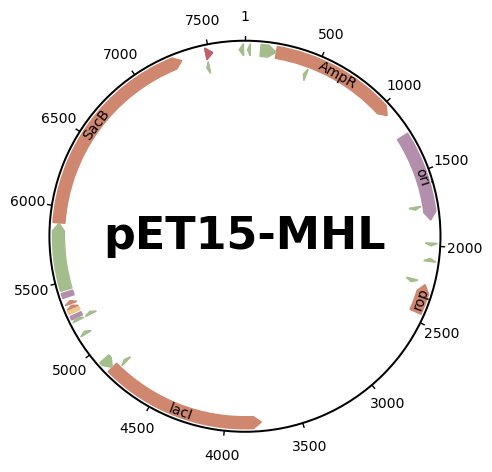

In [ ]:
import biotite
import biotite.sequence.graphics as graphics
import biotite.sequence.io.genbank as gb
import matplotlib.pyplot as plt


def read_genbank_file(file_path):
    """GenBank 파일을 읽고 주석 정보를 추출합니다."""
    gb_file = gb.GenBankFile.read(file_path)
    annotation = gb.get_annotation(
        gb_file,
        include_only=[
            "promoter",
            "terminator",
            "protein_bind",
            "RBS",
            "CDS",
            "rep_origin",
            "primer_bind",
        ],
    )
    _, seq_length, _, _, _, _ = gb.get_locus(gb_file)
    return annotation, seq_length


def custom_feature_formatter(feature):
    """각 유전자 요소의 시각화 스타일을 Nord 테마의 Aurora 색상으로 정의합니다."""
    label = feature.qual.get("label")
    # Nord Aurora 색상 정의
    nord_aurora = {
        "nord11": "#BF616A",  # 빨간색
        "nord12": "#D08770",  # 주황색
        "nord13": "#EBCB8B",  # 노란색
        "nord14": "#A3BE8C",  # 초록색
        "nord15": "#B48EAD",  # 보라색
    }
    style_map = {
        "promoter": (True, nord_aurora["nord14"], "black", label),
        "terminator": (True, nord_aurora["nord11"], "black", label),
        "protein_bind": (False, nord_aurora["nord15"], "black", label),
        "RBS": (False, nord_aurora["nord13"], "black", label),
        "CDS": (True, nord_aurora["nord12"], "black", label),
        "rep_origin": (True, nord_aurora["nord15"], "black", label),
        "primer_bind": (True, nord_aurora["nord14"], "black", label),
    }
    return style_map.get(feature.key, (False, "gray", "black", label))


def plot_plasmid_map(annotation, seq_length, file_name, figsize):
    """플라스미드 맵을 그립니다."""
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection="polar")
    graphics.plot_plasmid_map(
        ax,
        annotation,
        plasmid_size=seq_length,
        label=file_name,
        feature_formatter=custom_feature_formatter,
        tick_step=500,
    )
    fig.tight_layout()
    plt.show()


# 메인 실행 부분
file_path = "../data/input/pET15-MHL.gbk"
file_name = "pET15-MHL"

# GenBank 파일 읽기 및 주석 추출
annotation, seq_length = read_genbank_file(file_path)

# 플라스미드 맵 그리기
plot_plasmid_map(annotation, seq_length, file_name, (5, 5))

## ABI 트레이스 시각화

아래 코드는 Sanger법을 통한 DNA sequencing 결과 중 ABI 트레이스 파일을 검사하기 위해 작성되었습니다. 이미 다른 소프트웨어들이 있지만 사용하기 어려운 경우 Biopython을 사용해 아래와 같이 간단하게 작업할 수 있습니다.

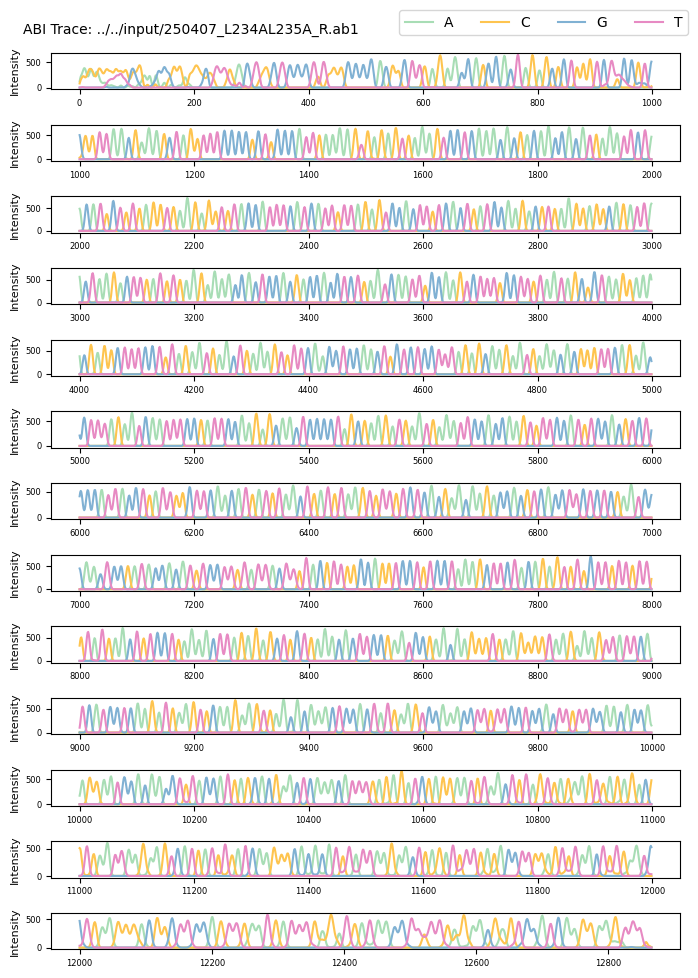

In [ ]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO


def plot_abi_trace_subplots(
    file_path,
    channels=None,
    start=None,
    end=None,
    points_per_subplot=1000,
    figsize=(14, 10),
    legend_labels=None,
):
    """
    ABI 파일의 trace 데이터를 읽어 subplot을 사용하여 여러 행으로 나누어 시각화하고,
    하나의 범례를 상단 오른쪽에 표시합니다. 각 subplot의 x축 레이블은 제거되고,
    제목은 왼쪽으로 정렬됩니다.

    Args:
        file_path (str): ABI 파일 경로.
        channels (list, optional): 플롯할 채널 목록. None이면 모든 채널을 플롯합니다.
        start (int, optional): 플롯할 데이터의 시작 인덱스.
        end (int, optional): 플롯할 데이터의 끝 인덱스.
        points_per_subplot (int, optional): 각 subplot에 표시할 데이터 포인트 수. 기본값은 1000입니다.
        figsize (tuple, optional): 전체 플롯 크기 (가로, 세로). 기본값은 (14, 10)입니다.
        legend_labels (list, optional): 범례에 표시할 레이블 목록. None이면 채널 이름을 사용합니다.
    """
    record = SeqIO.read(file_path, "abi")

    if channels is None:
        channels = ["DATA9", "DATA10", "DATA11", "DATA12"]

    trace = defaultdict(list)
    for c in channels:
        data = record.annotations["abif_raw"][c]
        if start is not None and end is not None:
            data = data[start:end]
        trace[c] = data

    num_points = len(trace[channels[0]]) if trace and trace[channels[0]] else 0
    num_subplots = int(np.ceil(num_points / points_per_subplot))

    fig, axes = plt.subplots(
        num_subplots, 1, figsize=figsize, sharex=False
    )  # sharex를 False로 유지
    if num_subplots == 1:
        axes = [axes]  # axes가 하나의 subplot인 경우 리스트로 감싸줍니다.

    pastel_colors = ["#a8ddb5", "#fec44f", "#80b1d3", "#e78ac3"]  # 파스텔 톤 색상
    lines = []
    labels = legend_labels if legend_labels else channels

    for i, c in enumerate(channels):
        color = pastel_colors[i % len(pastel_colors)]
        (line,) = axes[0].plot([], [], color=color, label=labels[i])
        lines.append(line)

    for i, ax in enumerate(axes):
        start_index = i * points_per_subplot
        end_index = min((i + 1) * points_per_subplot, num_points)
        x = np.arange(start_index, end_index)

        for j, c in enumerate(channels):
            data_segment = trace[c][start_index:end_index]
            ax.plot(x, data_segment, color=pastel_colors[j % len(pastel_colors)])

        ax.set_ylabel("Intensity", fontsize=8)
        ax.tick_params(axis="both", which="major", labelsize=6)
        ax.tick_params(axis="both", which="minor", labelsize=4)
        ax.set_xlabel("")

    fig.suptitle(f"ABI Trace: {file_path}", fontsize=10, x=0.28)  # 제목 왼쪽 정렬
    fig.legend(
        handles=lines,
        labels=labels,
        loc="upper right",
        bbox_to_anchor=(1.0, 1.0),
        ncol=len(channels),
    )
    fig.tight_layout(rect=[0, 0.02, 1, 0.95])  # 제목과 범례 공간 확보 및 조정
    plt.subplots_adjust(top=0.95)  # 제목 위치 추가 조정
    plt.show()


# 예시 사용:
file_path = "../../input/250407_L234AL235A_R.ab1"

# 전체 데이터 플롯을 1000 포인트씩 끊어서 여러 subplot으로 표시하고, 하나의 범례를 상단 오른쪽에 배치
plot_abi_trace_subplots(
    file_path,
    points_per_subplot=1000,
    figsize=(7, 10),
    legend_labels=["A", "C", "G", "T"],
)

## 코돈 사용 빈도를 통한 코돈 최적화

아래 코드는  대장균 K-12 균주의 코돈 사용 빈도 표를 생성합니다. 코돈 사용 빈도는 아미노산을 코딩하는 코돈들의 빈도를 나타냅니다. 이 빈도는 해당 생물체 내 tRNA의 양을 반영할 것으로 예상됩니다. 코돈 사용 빈도는 종마다 다릅니다. 따라서 코돈 최적화 등의 응용에서는 관심 있는 생물체의 코돈 사용 빈도를 살펴보는 것이 중요합니다.

코돈 사용 빈도 계산을 위해 주석이 달린 대장균 K-12 게놈을 살펴보겠습니다. 이 스크립트는 게놈에서 모든 코딩 서열(CDS)을 추출하고 이 서열들에서 각 코돈의 총 개수를 세어 냅니다. 그런 다음 각 코돈의 총 출현 횟수를 해당 아미노산의 총 출현 횟수로 나누어 상대 빈도를 계산합니다. 성능 향상을 위해 이 스크립트는 주로 기호 자체 대신 기호 코드를 사용합니다.

먼저 NCBI Entrez 데이터베이스에서 게놈(Accession: U00096)을 GenBank 파일로 가져와 AnnotatedSequence로 파싱합니다. 그런 다음 나중에 총 코돈 빈도를 저장할 딕셔너리를 만듭니다. 앞서 언급했듯이, 이 스크립트는 기호 코드로 작동합니다. 따라서 딕셔너리의 각 코돈은 3개의 문자 대신 3개의 정수로 표현됩니다.

코돈 사용 빈도 표는 목표 단백질의 DNA 서열을 코돈 사용 빈도에 맞춰 설계함으로써 재조합 단백질 발현을 최적화하는 데 사용될 수 있습니다. 이를 코돈 최적화라고 합니다. 하지만 코돈 최적화를 위한 다양한 알고리즘이 존재합니다. 간단히 하기 위해 이 예제에서는 각 아미노산에 대해 항상 가장 빈번하게 나타나는 코돈을 사용하는 방식을 채택합니다. 그런 다음 대장균 K-12에서의 발현을 위해 코돈 최적화된 DNA 서열을 출력해 보겠습니다.


In [ ]:
import itertools
import tempfile

import biotite.database.entrez as entrez
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.io.genbank as gb
import numpy as np


def fetch_genome_data(genome_id):
    """NCBI에서 게놈 데이터를 가져옵니다."""
    try:
        gb_file = gb.GenBankFile.read(
            entrez.fetch(genome_id, tempfile.gettempdir(), "gb", "nuccore", "gb")
        )
        return gb.get_annotated_sequence(gb_file, include_only=["CDS"])
    except Exception as e:
        raise RuntimeError(f"게놈 데이터를 가져오는 중 오류 발생: {e}")


def initialize_codon_counter(genome):
    """코돈 카운터를 초기화합니다."""
    return dict.fromkeys(itertools.product(*([range(len(genome.sequence.alphabet))] * 3)), 0)


def count_codons(genome, codon_counter):
    """CDS 영역에서 코돈을 카운트합니다."""
    for cds in genome.annotation:
        cds_seq = genome[cds]
        if len(cds_seq) % 3 != 0:
            continue
        for i in range(0, len(cds_seq), 3):
            codon_code = tuple(cds_seq.code[i : i + 3])
            codon_counter[codon_code] += 1
    return codon_counter


def calculate_relative_frequencies(codon_counter, codon_table):
    """코돈의 상대 빈도를 계산합니다."""
    for amino_acid_code in range(20):
        codon_codes_for_aa = codon_table[amino_acid_code]
        total = sum(codon_counter[codon_code] for codon_code in codon_codes_for_aa)
        if total == 0:
            continue
        for codon_code in codon_codes_for_aa:
            codon_counter[codon_code] /= total
    return codon_counter


def calculate_codon_usage(genome_id, codon_table_id):
    """주어진 게놈에 대한 코돈 사용을 계산합니다."""
    genome = fetch_genome_data(genome_id)
    codon_counter = initialize_codon_counter(genome)
    codon_counter = count_codons(genome, codon_counter)
    codon_table = seq.CodonTable.load(codon_table_id)
    return calculate_relative_frequencies(codon_counter, codon_table)


def find_optimal_codons(codon_counter, codon_table):
    """각 아미노산에 대한 최적의 코돈을 찾습니다."""
    optimal_codons = {}
    for amino_acid_code in range(20):
        codon_codes_for_aa = codon_table[amino_acid_code]
        optimal_codons[amino_acid_code] = max(
            codon_codes_for_aa, key=lambda c: codon_counter.get(c, 0)
        )
    return optimal_codons


def optimize_codon_for_protein_string(
    codon_counter, codon_table_id, protein_name, protein_sequence_str
):
    """주어진 단백질 서열에 대해 코돈 사용을 최적화합니다."""
    codon_table = seq.CodonTable.load(codon_table_id)
    optimal_codons = find_optimal_codons(codon_counter, codon_table)

    protein_sequence = seq.ProteinSequence(protein_sequence_str)
    dna_sequence = seq.NucleotideSequence()
    dna_sequence.code = np.concatenate(
        [optimal_codons[amino_acid_code] for amino_acid_code in protein_sequence.code]
    )
    dna_sequence += seq.NucleotideSequence("TAA")

    fasta_output = fasta.FastaFile()
    fasta_name = f"Codon_optimized_{protein_name}"
    fasta_output[fasta_name] = str(dna_sequence)
    return fasta_output


def parse_fasta(fasta_string):
    """FASTA 문자열을 파싱합니다."""
    return [
        (entry.split("\n")[0].strip(), "".join(entry.split("\n")[1:]).strip())
        for entry in fasta_string.strip().split(">")[1:]
    ]


genome_id = "U00096"
codon_table_id = 11
codon_counter = calculate_codon_usage(genome_id, codon_table_id)

fasta_string = """
>CBK51939
DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
"""

fasta_entries = parse_fasta(fasta_string)

for protein_name, protein_sequence in fasta_entries:
    optimized_sequence = optimize_codon_for_protein_string(
        codon_counter, codon_table_id, protein_name, protein_sequence
    )
    print(optimized_sequence)

>Codon_optimized_CBK51939
GATATTCAGATGACCCAGAGCCCGAGCAGCCTGAGCGCGAGCGTGGGCGATCGCGTGACCATTACCTGCCGCGCGAGCCA
GGGCATTAGCAGCTGGCTGGCGTGGTATCAGCAGAAACCGGAAAAAGCGCCGAAAAGCCTGATTTATGCGGCGAGCAGCC
TGCAGAGCGGCGTGCCGAGCCGCTTTAGCGGCAGCGGCAGCGGCACCGATTTTACCCTGACCATTAGCAGCCTGCAGCCG
GAAGATTTTGCGACCTATTATTGCCAGCAGTATTATAGCTATCCGCGCACCTTTGGCCAGGGCACCAAAGTGGAAATTAA
ATAA
>Codon_optimized_7WSL_L
GATATTCAGCTGACCCAGAGCCCGAGCTTTCTGAGCGCGTATGTGGGCGATCGCGTGACCATTACCTGCAAAGCGAGCCA
GGATGTGGGCACCGCGGTGGCGTGGTATCAGCAGAAACCGGGCAAAGCGCCGAAACTGCTGATTTATTGGGCGAGCACCC
TGCATACCGGCGTGCCGAGCCGCTTTAGCGGCAGCGGCAGCGGCACCGAATTTACCCTGACCATTAGCAGCCTGCAGCCG
GAAGATTTTGCGACCTATTATTGCCAGCATTATAGCAGCTATCCGTGGACCTTTGGCCAGGGCACCAAACTGGAAATTAA
ATAA


## 왓슨-크릭 염기쌍 시각화

제임스 왓슨과 프랜시스 크릭은 DNA 구조를 밝히는 과정에서 DNA 내의 염기들이 무작위로 쌍을 이루는 것이 아니라, 특정한 규칙에 따라 쌍을 이룬다는 것을 발견했습니다. 이 규칙을 **왓슨-크릭 염기쌍 규칙**이라고 하며, 다음과 같습니다.

- 아데닌(Adenine, A)은 항상 티민(Thymine, T)과 두 개의 수소 결합을 통해 쌍을 이룹니다.
- 구아닌(Guanine, G)은 항상 사이토신(Cytosine, C)과 세 개의 수소 결합을 통해 쌍을 이룹니다.

아래 코드는 실제 DNA 3차 구조에서 가져온 아데닌-티민 염기쌍과 구아닌-사이토신 염기쌍을 시각적으로 보여줍니다. 이를 통해 우리는 다음과 같은 점들을 더 명확하게 이해할 수 있습니다.

- 염기들의 공간적인 배열: 각 염기가 이중 나선 내에서 어떤 방향으로 놓여 있는지, 서로 어떻게 마주보고 있는지 등을 확인할 수 있습니다.
- 수소 결합의 위치와 개수: 아데닌과 티민 사이의 두 개, 구아닌과 사이토신 사이의 세 개 수소 결합의 정확한 위치와 방향을 시각적으로 파악할 수 있습니다. 이 수소 결합들이 염기쌍을 안정화시키는 중요한 역할을 한다는 것을 직접적으로 이해할 수 있습니다.

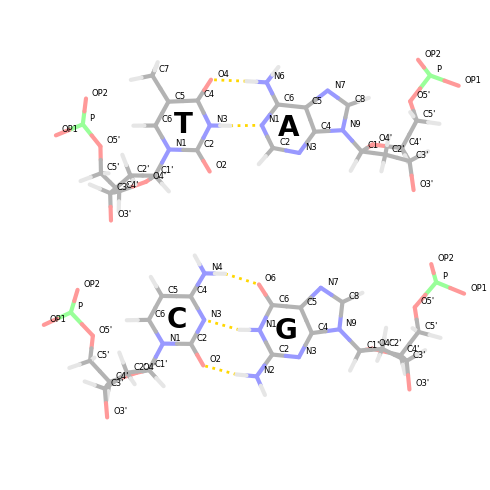

In [ ]:
import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.structure.graphics as graphics
import biotite.structure.io.pdbx as pdbx
import matplotlib.pyplot as plt
import numpy as np

# DNA 이중 나선 구조 데이터 가져오기
pdbx_file = pdbx.BinaryCIFFile.read(rcsb.fetch("1qxb", "bcif"))
structure = pdbx.get_structure(pdbx_file, model=1, include_bonds=True)
nucleotides = structure[struc.filter_nucleotides(structure)]

# 아데닌-티민과 구아닌-시토신 염기쌍 선택
base_pairs = struc.base_pairs(nucleotides)

# 구아닌-시토신 염기쌍 찾기
for i, j in base_pairs:
    if (nucleotides.res_name[i], nucleotides.res_name[j]) == ("DG", "DC"):
        guanine, cytosine = (
            nucleotides[mask] for mask in struc.get_residue_masks(nucleotides, [i, j])
        )
        break

# 아데닌-티민 염기쌍 찾기
for i, j in base_pairs:
    if (nucleotides.res_name[i], nucleotides.res_name[j]) == ("DA", "DT"):
        adenine, thymine = (
            nucleotides[mask] for mask in struc.get_residue_masks(nucleotides, [i, j])
        )
        break

pairs = [(guanine, cytosine), (adenine, thymine)]

# 그래프 설정
fig = plt.figure(figsize=(5.0, 5.0))
ax = fig.add_subplot(111, projection="3d")

# 염기 배열
for i, (purine, pyrimidine) in enumerate(pairs):
    # 피리미딘 염기의 주요 원자 좌표 추출
    n1, n3, c5, c6 = (
        pyrimidine[pyrimidine.atom_name == name][0] for name in ("N1", "N3", "C5", "C6")
    )
    # 피리미딘 N3-C6 축을 x축에 정렬
    purine, pyrimidine = (
        struc.align_vectors(base, n3.coord - c6.coord, np.array([1, 0, 0]))
        for base in (purine, pyrimidine)
    )
    # 좌표 업데이트
    n1, n3, c4, c5 = (
        pyrimidine[pyrimidine.atom_name == name][0] for name in ("N1", "N3", "C4", "C5")
    )
    # 피리미딘 염기 평면 법선 벡터를 z축에 정렬하고 염기 간 거리 설정
    purine, pyrimidine = (
        struc.align_vectors(
            base,
            np.cross(n3.coord - n1.coord, c5.coord - n1.coord),
            np.array([0, 0, 1]),
            origin_position=struc.centroid(purine + pyrimidine),
            target_position=np.array([0, 10 * i, 0]),  # 10 Å 간격으로 염기쌍 분리
        )
        for base in (purine, pyrimidine)
    )
    pairs[i] = (purine, pyrimidine)

# 염기쌍 그리기
atoms = pairs[0][0] + pairs[0][1] + pairs[1][0] + pairs[1][1]
# 원소별 색상 지정
colors = np.zeros((atoms.array_length(), 3))
colors[atoms.element == "H"] = (0.9, 0.9, 0.9)  # 밝은 회색 (파스텔 톤)
colors[atoms.element == "C"] = (0.7, 0.7, 0.7)  # 연한 회색 (파스텔 톤)
colors[atoms.element == "N"] = (0.6, 0.6, 1.0)  # 연한 파란색 (파스텔 톤)
colors[atoms.element == "O"] = (1.0, 0.6, 0.6)  # 연한 빨간색 (파스텔 톤)
colors[atoms.element == "P"] = (0.6, 1.0, 0.6)  # 연한 초록색 (파스텔 톤)
graphics.plot_atoms(ax, atoms, colors, line_width=3, background_color="white", zoom=1.5)

# 수소 결합 그리기
for purine, pyrimidine in pairs:
    pair = purine + pyrimidine
    bonds = struc.hbond(pair)
    for donor, hydrogen, acceptor in bonds:
        hydrogen_coord = pair.coord[hydrogen]
        acceptor_coord = pair.coord[acceptor]
        x, y, z = zip(hydrogen_coord, acceptor_coord)
        ax.plot(x, y, z, linestyle=":", color="gold", linewidth=2)

# 무거운 원자 라벨링
heavy_atoms = atoms[atoms.element != "H"]
for name, coord in zip(heavy_atoms.atom_name, heavy_atoms.coord):
    coord = coord + [0.3, 0.15, 0]
    ax.text(*coord, name, fontsize="6")

# 염기 라벨링
for pair in pairs:
    for base in pair:
        label = base.res_name[0][1]
        ring_center = struc.centroid(
            base[np.isin(base.atom_name, ["N1", "C2", "N3", "C4", "C5", "C6"])]
        )
        x, y, z = ring_center
        ax.text(x, y, z, label, fontsize=20, fontweight="bold", va="center", ha="center")

# 그래프 표시
fig.tight_layout()
plt.show()

# 단백질 분석 관련

## Protpram 분석 결과

ProtParam은 Expasy Proteomics Server에서 개발된 생물정보학 도구로 단백질의 아래와 같이 다양한 물리적 및 화학적 특성을 계산합니다.

- **분자량**  
- **이론적 등전점(pI)**  
- **아미노산 조성**  
- **소광 계수(Extinction coefficient)**  
- **불안정성 지수(Instability index)**: 단백질 안정성을 예측하며, 값이 40 미만일 경우 안정적임을 나타냅니다.  
- **지방족 지수(Aliphatic index)**: 지방족 아미노산을 기반으로 열 안정성을 반영합니다.  
- **평균 소수성 지수(GRAVY)**: 소수성(양수 값) 또는 친수성(음수 값)을 측정합니다.

Biopython을 사용해 protpram분석을 하고 데이터 프레임으로 만들어보겠습니다.

In [ ]:
from io import StringIO

import pandas as pd
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis


def calculate_molecular_formula(sequence):
    """주어진 서열의 분자식을 계산합니다."""
    amino_acid_atoms = {
        "A": {"C": 3, "H": 7, "N": 1, "O": 2, "S": 0},
        "R": {"C": 6, "H": 14, "N": 4, "O": 2, "S": 0},
        "N": {"C": 4, "H": 8, "N": 2, "O": 3, "S": 0},
        "D": {"C": 4, "H": 7, "N": 1, "O": 4, "S": 0},
        "C": {"C": 3, "H": 7, "N": 1, "O": 2, "S": 1},
        "Q": {"C": 5, "H": 10, "N": 2, "O": 3, "S": 0},
        "E": {"C": 5, "H": 9, "N": 1, "O": 4, "S": 0},
        "G": {"C": 2, "H": 5, "N": 1, "O": 2, "S": 0},
        "H": {"C": 6, "H": 9, "N": 3, "O": 2, "S": 0},
        "I": {"C": 6, "H": 13, "N": 1, "O": 2, "S": 0},
        "L": {"C": 6, "H": 13, "N": 1, "O": 2, "S": 0},
        "K": {"C": 6, "H": 14, "N": 2, "O": 2, "S": 0},
        "M": {"C": 5, "H": 11, "N": 1, "O": 2, "S": 1},
        "F": {"C": 9, "H": 11, "N": 1, "O": 2, "S": 0},
        "P": {"C": 5, "H": 9, "N": 1, "O": 2, "S": 0},
        "S": {"C": 3, "H": 7, "N": 1, "O": 3, "S": 0},
        "T": {"C": 4, "H": 9, "N": 1, "O": 3, "S": 0},
        "W": {"C": 11, "H": 12, "N": 2, "O": 2, "S": 0},
        "Y": {"C": 9, "H": 11, "N": 1, "O": 3, "S": 0},
        "V": {"C": 5, "H": 11, "N": 1, "O": 2, "S": 0},
    }

    protein_analysis = ProteinAnalysis(sequence)
    amino_acid_counts = protein_analysis.count_amino_acids()

    carbon_total = 0
    hydrogen_total = 0
    oxygen_total = 0
    nitrogen_total = 0
    sulfur_total = 0
    peptide_bonds = 0

    for amino_acid, count in amino_acid_counts.items():
        if amino_acid in amino_acid_atoms:
            atoms = amino_acid_atoms[amino_acid]
            peptide_bonds += count
            carbon_total += count * atoms["C"]
            hydrogen_total += count * atoms["H"]
            oxygen_total += count * atoms["O"]
            nitrogen_total += count * atoms["N"]
            sulfur_total += count * atoms["S"]

    peptide_bonds -= 1
    hydrogen_total -= peptide_bonds * 2
    oxygen_total -= peptide_bonds

    molecular_formula = (
        f"C{carbon_total}H{hydrogen_total}N{nitrogen_total}O{oxygen_total}S{sulfur_total}"
    )
    total_atoms = carbon_total + hydrogen_total + nitrogen_total + oxygen_total + sulfur_total
    return molecular_formula, total_atoms


def analyze_protein_sequence(fasta_string):
    """FASTA 형식의 단백질 서열 문자열을 분석하고 pandas DataFrame으로 반환합니다."""

    fasta_records = SeqIO.parse(StringIO(fasta_string.strip()), "fasta")
    results = []

    for record in fasta_records:
        protein_sequence = str(record.seq)
        protein_analysis = ProteinAnalysis(protein_sequence)
        molecular_weight = protein_analysis.molecular_weight()
        protein_id = record.id
        total_amino_acids = len(protein_sequence)

        molecular_formula, total_atoms = calculate_molecular_formula(protein_sequence)
        extinction_coefficients = protein_analysis.molar_extinction_coefficient()

        results.append(
            {
                "Name": protein_id,
                "Molecular Weight (Dalton)": molecular_weight,
                "Total Amino Acids": total_amino_acids,
                "Chemical Formula": molecular_formula,
                "Total Atoms": total_atoms,
                "Extinction Coefficient (Reduced)": extinction_coefficients[0],
                "Extinction Coefficient (Non-Reduced)": extinction_coefficients[1],
                "Reduced Abs 0.1% (g/L)": extinction_coefficients[0] / molecular_weight,
                "Non-Reduced Abs 0.1% (g/L)": extinction_coefficients[1] / molecular_weight,
                "Theoretical pI": protein_analysis.isoelectric_point(),
                "Aromaticity (%)": protein_analysis.aromaticity() * 100,
                "GRAVY": protein_analysis.gravy(),
                "Instability Index": protein_analysis.instability_index(),
            }
        )

    return pd.DataFrame(results)


# Example Usage
fasta_string = """
>CBK51939
DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
>8AS0_C
DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQDYGLPFTFGQGTKVEIK
>7CGW_B
DIVMTQSPDSLAVSLGERATINCKSSESVSNDVAWYQQKPGQPPKLLINYAFHRFTGVPDRFSGSGYGTDFTLTISSLQAEDVAVYYCHQAYSSPYTFGQGTKLEIK
>5JXE_C
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
>5B8C_A
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
"""

df = analyze_protein_sequence(fasta_string)
df

,Name,Molecular Weight (Dalton),Total Amino Acids,Chemical Formula,Total Atoms,Extinction Coefficient (Reduced),Extinction Coefficient (Non-Reduced),Reduced Abs 0.1% (g/L),Non-Reduced Abs 0.1% (g/L),Theoretical pI,Aromaticity (%),GRAVY,Instability Index
0,CBK51939,11708.8783,107,C519H796N136O167S3,1621,21430,21555,1.830235,1.840911,8.620213,12.149533,-0.419626,55.086916
1,7WSL_L,11795.0749,107,C537H806N134O162S2,1641,26930,27055,2.283156,2.293754,7.955350,14.018692,-0.276636,38.553271
2,8AS0_C,11575.7706,107,C513H793N133O166S3,1608,14440,14565,1.247433,1.258232,7.952062,11.214953,-0.305607,58.362617
3,7CGW_B,11778.9694,107,C526H798N136O166S3,1629,15930,16055,1.352410,1.363022,5.517384,12.149533,-0.338318,40.328972
4,5JXE_C,11997.3292,111,C538H832N140O167S2,1679,15930,16055,1.327796,1.338215,6.997187,10.810811,-0.189189,42.244144
5,5B8C_A,11997.3292,111,C538H832N140O167S2,1679,15930,16055,1.327796,1.338215,6.997187,10.810811,-0.189189,42.244144


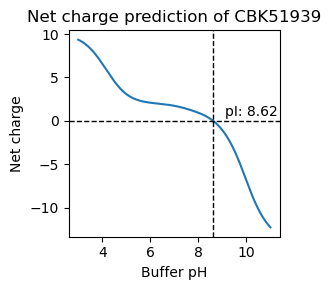

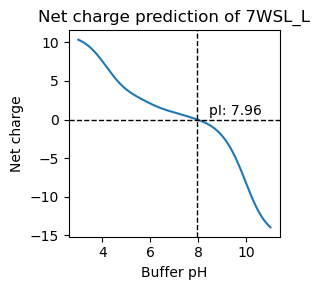

In [ ]:
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis


def plot_protein_charge_vs_ph(fasta_string, figsize=(3, 3)):
    """FASTA 형식의 단백질 서열 문자열에서 각 단백질의 pH에 따른 전하 변화를 그래프로 표시합니다.
    netcharge가 0이 되는 x축 값을 annotation으로 추가합니다.
    """

    fasta_records = SeqIO.parse(StringIO(fasta_string.strip()), "fasta")

    for record in fasta_records:
        protein_id = record.id
        protein_sequence = str(record.seq)
        protein_analysis = ProteinAnalysis(protein_sequence)
        isoelectric_point = protein_analysis.isoelectric_point()

        x = np.linspace(3, 11, 1000)
        y = protein_analysis.charge_at_pH(x)

        fig, ax = plt.subplots(figsize=figsize)  # 그래프 크기 조정

        ax.plot(x, y)
        ax.axhline(y=0, color="k", linestyle="--", linewidth=1)
        ax.axvline(isoelectric_point, color="k", linestyle="--", linewidth=1)

        ax.set_xlabel("Buffer pH", size=10)
        ax.set_ylabel("Net charge", size=10)
        ax.set_title(f"Net charge prediction of {protein_id}", size=12)

        # netcharge가 0이 되는 x축 값 (등전점)에 대한 annotation 추가
        ax.annotate(
            f"pI: {isoelectric_point:.2f}",
            xy=(isoelectric_point, 0),
            xytext=(isoelectric_point + 0.5, 0.6),  # 텍스트 위치 조정
            fontsize=10,
        )

        plt.tight_layout()  # 그래프 요소들이 겹치지 않게 자동 조정
        plt.show()


# Example Usage
fasta_string = """
>CBK51939
DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
"""

plot_protein_charge_vs_ph(fasta_string, figsize=(3, 3))

## 화학적 변형 가능 위치(Potential sites of chemical modification) 예측

이 섹션에서는 순수 서열 분석을 기반으로 단백질에 일어나는 화학적 변형 위치를 예측해보겠습니다. 대부분의 단백질은 합성 과정에서 당화(glycosylation)라는 과정을 거칩니다. 단백질 당화 패턴은 약물의 반감기, 안정성, 안전성, 그리고 약효에 큰 영향을 미치는 것으로 알려져 있습니다. 

> 단백질의 당화는 크게 O-결합 및 N-결합 글라이칸의 두 가지가 있으며 O-결합 당화는 산소 원자를 매개로 올리고당이 세린 또는 트레오닌 아미노산 잔기에 결합하는 과정이며, N-결합 당화는 질소 원자를 매개로 올리고당이 아스파라긴 아미노산 잔기에 결합하는 과정입니다.

### 탈아미드화(deamidation) 가능 위치

아스파라긴(N) 및 글루타민(Q) 잔기는 서열 내에서 작은 측쇄를 가진 아미노산이 뒤따라 중간 펩타이드 그룹이 더 노출될 때 특히 탈아미드화되기 쉽습니다. 민감한 아미노산 뒤에 펩타이드 그룹이 공격받기 쉽도록 글리신과 같은 작고 유연한 잔기가 오는 경우 탈아미드화가 훨씬 빠르게 진행됩니다.

검색 패턴: ASN/GLN-ALA/GLY/SER/THR

### O-결합 글리코실화 가능 위치

세린 및 트레오닌 잔기의 O-연결 글리코실화는 서열 내에서 특히 2-1 및 +3 위치에 하나 이상의 프롤린 잔기가 근처에 존재하는 것에 민감한 것으로 알려져 있습니다.

검색 패턴: PRO-SER/THR
검색 패턴: SER/THR-X-X-PRO

### N-결합 글리코실화 가능 위치

기본적인 N-글리코실화 부위를 찾는 패턴은 다음과 같습니다.

검색 패턴: ASN-X-SER/THR (X에서 프롤린 제외)

> 주의 사항: PTM은 서열 외에도 단백질의 3차원 구조 주변 환경 등 다양한 요인의 영향을 받습니다. 따라서, 정규 표현식만으로는 가능성을 100% 정확하게 예측할 수 없습니다. 따라서 추가적인 실험적 검증을 통해 예측 결과를 확인하는 것이 좋습니다.

In [ ]:
import re
from io import StringIO

import pandas as pd
from Bio import SeqIO


def find_modification_sites(fasta_string):
    """FASTA 형식의 단백질 서열 문자열에서 변형 부위를 찾아 DataFrame으로 반환합니다."""

    fasta_records = SeqIO.parse(StringIO(fasta_string.strip()), "fasta")
    results = []

    for record in fasta_records:
        protein_id = record.id
        protein_sequence = str(record.seq)

        # 탈아미드화 가능 위치 찾기
        deamidation_pattern = "(N|Q)(A|G|S|T)"
        deamidation_matches = list(re.finditer(deamidation_pattern, protein_sequence))
        deamidation_sites = [f"{i.start() + 1}-{i.group()}-{i.end()}" for i in deamidation_matches]

        # O-연결 글리코실화 가능 위치 (PRO-SER/THR) 찾기
        o_glycosylation_pattern1 = "P(S|T)"
        o_glycosylation_matches1 = list(re.finditer(o_glycosylation_pattern1, protein_sequence))
        o_glycosylation_sites1 = [
            f"{i.start() + 1}-{i.group()}-{i.end()}" for i in o_glycosylation_matches1
        ]

        # O-연결 글리코실화 가능 위치 (SER/THR-X-X-PRO) 찾기
        o_glycosylation_pattern2 = "(S|T)[A-Z]{2}P"
        o_glycosylation_matches2 = list(re.finditer(o_glycosylation_pattern2, protein_sequence))
        o_glycosylation_sites2 = [
            f"{i.start() + 1}-{i.group()}-{i.end()}" for i in o_glycosylation_matches2
        ]

        # N-연결 글리코실화 가능 위치 찾기
        N_glycosylation_pattern = "N[^P][ST]"
        N_glycosylation_matches = list(re.finditer(N_glycosylation_pattern, protein_sequence))
        N_glycosylation_sites = [
            f"{i.start() + 1}-{i.group()}-{i.end()}" for i in N_glycosylation_matches
        ]

        results.append(
            {
                "Protein ID": protein_id,
                "Deamidation Sites": ", ".join(deamidation_sites) if deamidation_sites else "None",
                "O-Glycosylation Sites (PRO-SER/THR)": ", ".join(o_glycosylation_sites1)
                if o_glycosylation_sites1
                else "None",
                "O-Glycosylation Sites (SER/THR-X-X-PRO)": ", ".join(o_glycosylation_sites2)
                if o_glycosylation_sites2
                else "None",
                "N-Glycosylation Sites (ASN-X-SER/THR)": ", ".join(N_glycosylation_sites)
                if N_glycosylation_sites
                else "None",
            }
        )

    return pd.DataFrame(results)


# Example Usage
fasta_string = """
>CBK51939
DIQMTQNSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
>8AS0_C
DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQDYGLPFTFGQGTKVEIK
>7CGW_B
DIVMTQSPDSLAVSLGERATINCKSSESVSNDVAWYQQKPGQPPKLLINYAFHRFTGVPDRFSGSGYGTDFTLTISSLQAEDVAVYYCHQAYSSPYTFGQGTKLEIK
>5JXE_C
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
>5B8C_A
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
"""

df = find_modification_sites(fasta_string)
df

,Protein ID,Deamidation Sites,O-Glycosylation Sites (PRO-SER/THR),O-Glycosylation Sites (SER/THR-X-X-PRO),N-Glycosylation Sites (ASN-X-SER/THR)
0,CBK51939,"7-NS-8, 28-QG-29, 56-QS-57, 101-QG-102","9-PS-10, 60-PS-61","57-SGVP-60, 78-SLQP-81",None
1,7WSL_L,"6-QS-7, 100-QG-101","8-PS-9, 59-PS-60","5-TQSP-8, 56-TGVP-59, 77-SLQP-80, 92-SSYP-95",None
2,8AS0_C,"6-QS-7, 27-QS-28, 55-QS-56, 100-QG-101","8-PS-9, 59-PS-60","5-TQSP-8, 56-SGVP-59, 77-SLQP-80",None
3,7CGW_B,"6-QS-7, 79-QA-80, 90-QA-91, 100-QG-101",None,"5-TQSP-8, 56-TGVP-59",None
4,5JXE_C,"6-QS-7, 46-QA-47",None,"5-TQSP-8, 12-SLSP-15, 60-SGVP-63, 81-SLEP-84",None
5,5B8C_A,"6-QS-7, 46-QA-47",None,"5-TQSP-8, 12-SLSP-15, 60-SGVP-63, 81-SLEP-84",None


## 계통수 관련

### 아미노산 유사도에 대한 계통수 그리기

이 예제에서는 아미노산 유성을 나타내는 BLOSUM62 행렬의 정보를 통해 계통수를 시각화 합니다.

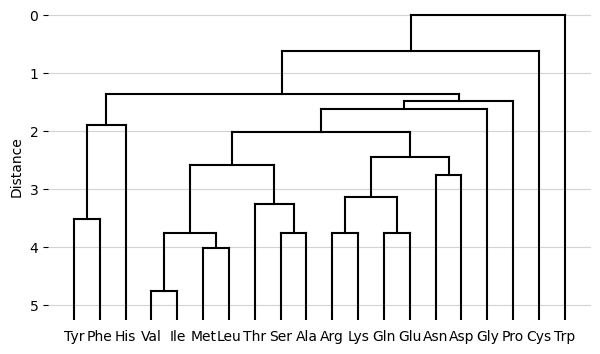

In [ ]:
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.sequence.phylo as phylo
import matplotlib.pyplot as plt
import numpy as np


def visualize_amino_acid_distances(substitution_matrix=None):
    """
    아미노산 간의 거리를 계산하고 덴드로그램으로 시각화합니다.

    Args:
        substitution_matrix (align.SubstitutionMatrix, optional): 사용할 치환 행렬.
            기본값은 BLOSUM62입니다.
    """

    # 1. 치환 행렬 준비 (BLOSUM62 또는 사용자 지정)
    if substitution_matrix is None:
        matrix = align.SubstitutionMatrix.std_protein_matrix()
        # 불명확한 기호나 정지 신호 제거
        matrix = align.SubstitutionMatrix(
            seq.Alphabet(matrix.get_alphabet1().get_symbols()[:-4]),
            seq.Alphabet(matrix.get_alphabet2().get_symbols()[:-4]),
            matrix.score_matrix()[:-4, :-4],
        )
    else:
        matrix = substitution_matrix

    similarities = matrix.score_matrix()  # 유사도 행렬

    # 2. 거리 계산 함수 정의
    def calculate_distance(similarity_matrix, i, j):
        """두 아미노산 간의 거리를 계산합니다."""
        max_similarity = (similarity_matrix[i, i] + similarity_matrix[j, j]) / 2
        return max_similarity - similarity_matrix[i, j]

    # 3. 거리 행렬 생성
    num_amino_acids = similarities.shape[0]
    distances = np.zeros((num_amino_acids, num_amino_acids))
    for i in range(num_amino_acids):
        for j in range(num_amino_acids):
            distances[i, j] = calculate_distance(similarities, i, j)

    # 4. UPGMA 알고리즘으로 계통수 생성
    tree = phylo.upgma(distances)

    # 5. 덴드로그램 시각화
    fig, ax = plt.subplots(figsize=(7, 4))
    amino_acid_labels = [
        seq.ProteinSequence.convert_letter_1to3(letter).capitalize()
        for letter in matrix.get_alphabet1()
    ]
    graphics.plot_dendrogram(ax, tree, orientation="top", labels=amino_acid_labels)
    ax.set_ylabel("Distance")
    ax.yaxis.grid(color="lightgray")  # 그리드 추가
    plt.show()


# 아미노산 거리 시각화 (기본 BLOSUM62 사용)
visualize_amino_acid_distances()

### 단백질간 계통수(Dendrogram) 그리기

이 예제는 서로 다른 단백질들 서열로 간단한 계통수를 그립니다. 계통수를 그리는 알고리즘으로는 UPGMA을 사용합니다.

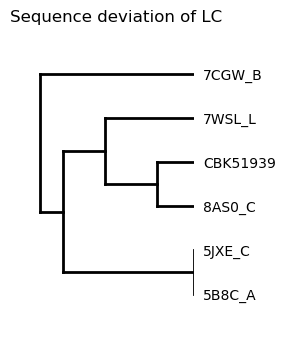

In [ ]:
import io

import biotite.application.clustalo as clustalo
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta
import biotite.sequence.phylo as phylo
import matplotlib.pyplot as plt


def build_and_plot_phylogenetic_tree(fasta_string, title="Sequence deviation", figsize=(5, 5)):
    """
    주어진 FASTA 문자열로부터 계통수를 생성하고 시각화합니다.

    Args:
        fasta_string (str): FASTA 형식의 서열 문자열.
        title (str, optional): 플롯 제목. 기본값은 "Sequence deviation".
    """

    # FASTA 문자열을 시퀀스 딕셔너리로 변환
    fasta_file = io.StringIO(fasta_string)
    fasta_sequences = fasta.FastaFile.read(fasta_file)
    sequences_dict = fasta.get_sequences(fasta_sequences)

    # 다중 서열 정렬 (MSA) 생성
    alignment = clustalo.ClustalOmegaApp.align(list(sequences_dict.values()))

    # 서열 동일성 기반의 거리 행렬 생성
    distances = 1 - align.get_pairwise_sequence_identity(alignment, mode="shortest")

    # UPGMA 알고리즘을 사용하여 계통수 생성
    tree = phylo.upgma(distances)

    # 계통수 플롯
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    graphics.plot_dendrogram(
        ax,
        tree,
        orientation="left",
        labels=list(sequences_dict.keys()),
        show_distance=False,
        linewidth=2,
    )

    ax.grid(False)
    ax.set_xticks([])
    ax.set_title(title)
    plt.show()


# FASTA 문자열
fasta_string = """
>CBK51939
DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
>8AS0_C
DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQDYGLPFTFGQGTKVEIK
>7CGW_B
DIVMTQSPDSLAVSLGERATINCKSSESVSNDVAWYQQKPGQPPKLLINYAFHRFTGVPDRFSGSGYGTDFTLTISSLQAEDVAVYYCHQAYSSPYTFGQGTKLEIK
>5JXE_C
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
>5B8C_A
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
"""

# 함수 호출
build_and_plot_phylogenetic_tree(fasta_string, title="Sequence deviation of LC", figsize=(2, 4))

### 단백질 패밀리간의 계통수

이 예제에서는 다양한 G-단백질 연결 수용체(GPCR)의 진화를 나타내는 비뿌리 계통수를 그립니다. GPCR의 UniProt ID와 유전자 이름은 해당 키워드를 통해 얻고 관련된 서열을 다운로드해 정렬합니다. 다중 서열 정렬에서 쌍별 서열 유사성을 기반으로 이웃-결합(neighbor-joining) 방법을 사용하여 계통수를 생성합니다. 마지막으로 `NetworkX` 패키지의 그래프 기능을 활용해 시각화합니다.

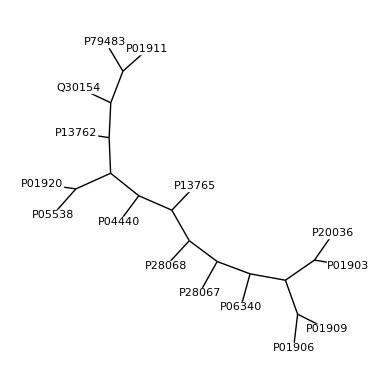

In [ ]:
import re

import biotite.application.clustalo as clustalo
import biotite.database.uniprot as uniprot
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.io.fasta as fasta
import biotite.sequence.phylo as phylo
import matplotlib.pyplot as plt
import networkx as nx

# 인간 GPCR을 연구합니다
SPECIES = "Human"

# UniProt 데이터베이스에서 인간 GPCR 단백질 검색
query = (
    uniprot.SimpleQuery("reviewed", "true")
    & uniprot.SimpleQuery("organism_name", "Homo sapiens")
    & uniprot.SimpleQuery("keyword", "KW-0491")  # MHC II 키워드 ID
    # uniprot.SimpleQuery("protein_name", "prion proteins")
)
ids = uniprot.search(query)

# 시퀀스 파일 다운로드 및 시퀀스 읽기
genes = []
sequences = []
gene_name_pattern = (
    "(?<=GN=)[0-9A-Za-z]+"  # FASTA 헤더에서 유전자 이름을 추출하기 위한 정규표현식 패턴
)
for file in uniprot.fetch(ids, "fasta"):
    fasta_file = fasta.FastaFile.read(file)
    for header, seq_str in fasta_file.items():
        genes.append(re.search(gene_name_pattern, header).group(0))
        sequences.append(seq.ProteinSequence(seq_str))

# Clustal Omega를 사용하여 다중 서열 정렬 생성
alignment = clustalo.ClustalOmegaApp.align(sequences)

# 트리 계산에 필요한 거리 측정: 두 시퀀스에서 동일하지 않은 아미노산의 비율
distances = 1 - align.get_pairwise_sequence_identity(alignment, mode="shortest")
# 이웃 결합 방법을 통해 트리 생성
tree = phylo.neighbor_joining(distances)
# NetworkX 그래프로 변환 (그래프 시각화를 위해 간선 방향은 불필요)
graph = tree.as_graph().to_undirected()

# 그래프 시각화
fig = plt.figure(figsize=(4, 4))
ax = fig.gca()
ax.axis("off")
pos = nx.kamada_kawai_layout(graph)  # 그래프에서 노드 위치 계산
node_labels = dict(enumerate(ids))  # 노드에 ID를 이름으로 할당
nx.draw_networkx_edges(graph, pos, ax=ax)
nx.draw_networkx_labels(
    graph,
    pos,
    ax=ax,
    labels=node_labels,
    font_size=8,
    bbox={"pad": 0, "color": "white"},  # 가독성을 위해 라벨 뒤에 흰색 배경 추가
)
fig.tight_layout()

plt.show()

## 단백질 서열 정렬 

Clustal Omega를 사용하여 서열 정렬을 수행하고 시각화합니다.

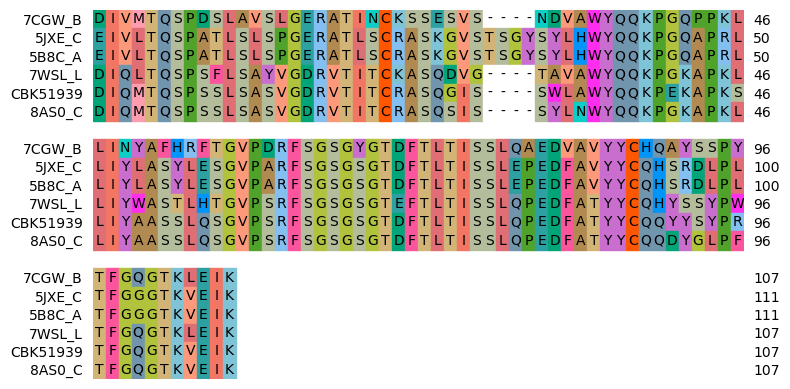

In [ ]:
import io

import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta
import matplotlib.pyplot as plt
from biotite.application.clustalo import ClustalOmegaApp


def align_and_visualize_sequences(fasta_string, figsize=(8, 4)):
    """
    주어진 FASTA 형식의 문자열로부터 서열을 정렬하고 시각화합니다.

    Args:
        fasta_string (str): FASTA 형식의 서열 문자열.
    """
    # 문자열을 파일 객체로 변환
    fasta_file = io.StringIO(fasta_string)

    # FastaFile 객체 생성
    fasta_sequences = fasta.FastaFile.read(fasta_file)

    # 시퀀스 가져오기
    sequences_dict = fasta.get_sequences(fasta_sequences)

    # 딕셔너리 값들의 리스트로 변환
    sequences_list = list(sequences_dict.values())

    # 서열 개수에 따라 정렬 방법 선택
    if len(sequences_list) < 3:
        # pairwise alignment
        alignment = align.align_global_gaps(sequences_list[0], sequences_list[1])
        alignments = align.Alignment(sequences_list, alignment.trace)
        order = [0, 1]

    else:
        # ClustalOmega 실행
        app = ClustalOmegaApp(sequences_list)
        app.start()
        app.join()
        alignments = app.get_alignment()
        order = app.get_alignment_order()

    # 시각화
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    # 시퀀스 이름 리스트 생성
    sequence_names = list(sequences_dict.keys())
    # 정렬 순서에 맞게 시퀀스 이름 재정렬
    ordered_names = [sequence_names[i] for i in order]

    graphics.plot_alignment_type_based(
        ax,
        alignments[:, order.tolist()],
        labels=ordered_names,  # 시퀀스 이름을 레이블로 사용
        show_numbers=True,
        color_scheme="flower",
    )
    fig.tight_layout()
    plt.show()


# 예시 FASTA 문자열
fasta_string = """
>CBK51939
DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
>8AS0_C
DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQDYGLPFTFGQGTKVEIK
>7CGW_B
DIVMTQSPDSLAVSLGERATINCKSSESVSNDVAWYQQKPGQPPKLLINYAFHRFTGVPDRFSGSGYGTDFTLTISSLQAEDVAVYYCHQAYSSPYTFGQGTKLEIK
>5JXE_C
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
>5B8C_A
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
"""

# 함수 호출
align_and_visualize_sequences(fasta_string, figsize=(8, 4))

### 서열이 다른 부분만 강조하기


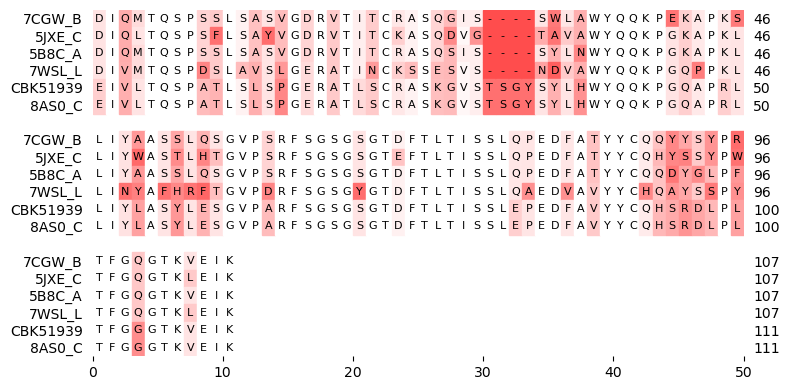

In [ ]:
import io

import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta
import matplotlib.pyplot as plt
from biotite.application.clustalo import ClustalOmegaApp
from matplotlib.colors import LinearSegmentedColormap


def visualize_sequence_alignment(fasta_string, annotations=None, figsize=(8, 4)):
    """
    주어진 FASTA 형식의 문자열로부터 서열을 정렬하고 시각화합니다.
    서열이 2개인 경우와 3개 이상인 경우를 모두 처리합니다.

    Args:
        fasta_string (str): FASTA 형식의 서열 문자열.
        annotations (list, optional): 시각화에 추가할 주석 목록.
            각 주석은 (x_position, y_position, symbol, color) 튜플로 표현됩니다.
    """

    # FASTA 문자열을 파일 객체로 변환하고 시퀀스 가져오기
    fasta_file = io.StringIO(fasta_string)
    fasta_sequences = fasta.FastaFile.read(fasta_file)
    sequences_dict = fasta.get_sequences(fasta_sequences)
    sequences_list = list(sequences_dict.values())
    sequence_names = list(sequences_dict.keys())

    # 서열 개수에 따라 정렬 방법 선택
    if len(sequences_list) == 2:
        # 두 개의 서열인 경우 ungapped alignment
        matrix = align.SubstitutionMatrix.std_protein_matrix()
        alignment = align.align_ungapped(sequences_list[0], sequences_list[1], matrix=matrix)
        alignments = align.Alignment(sequences_list[:2], alignment.trace)
        order = [0, 1]
    else:
        # 세 개 이상의 서열인 경우 ClustalOmega 사용
        app = ClustalOmegaApp(sequences_list)
        app.start()
        app.join()
        alignments = app.get_alignment()
        order = app.get_alignment_order()

    # 유사도 기반의 색상 맵 생성 (낮은 유사도는 빨간색, 높은 유사도는 흰색)
    cmap = LinearSegmentedColormap.from_list("custom", [(1.0, 0.3, 0.3), (1.0, 1.0, 1.0)])

    # 주석 추가 함수
    def add_annotation(ax, position, sequence_index, symbol="*", color="grey"):
        y_pos = 1 - (sequence_index * 0.2)  # 수직 위치 조절
        ax.text(
            position,
            y_pos,
            symbol,
            color=color,
            ha="center",
            va="center",
            fontweight="bold",
        )

    # 시각화
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    graphics.plot_alignment_similarity_based(
        ax,
        alignments,
        matrix=align.SubstitutionMatrix.std_protein_matrix(),
        symbols_per_line=50,
        labels=[sequence_names[i] for i in order],  # 정렬 순서에 맞게 레이블 설정
        show_numbers=True,
        cmap=cmap,
        symbol_size=8,
        show_line_position=True,
    )

    # 주석 추가
    if annotations:
        for pos, seq_idx, sym, col in annotations:
            add_annotation(ax, pos, seq_idx, sym, col)

    fig.tight_layout()
    plt.show()


# FASTA 문자열
fasta_string = """
>CBK51939
DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
>8AS0_C
DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQDYGLPFTFGQGTKVEIK
>7CGW_B
DIVMTQSPDSLAVSLGERATINCKSSESVSNDVAWYQQKPGQPPKLLINYAFHRFTGVPDRFSGSGYGTDFTLTISSLQAEDVAVYYCHQAYSSPYTFGQGTKLEIK
>5JXE_C
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
>5B8C_A
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
"""

# 함수 호출
visualize_sequence_alignment(fasta_string, figsize=(8, 4))

### 돌연변이 서열만 표시하기

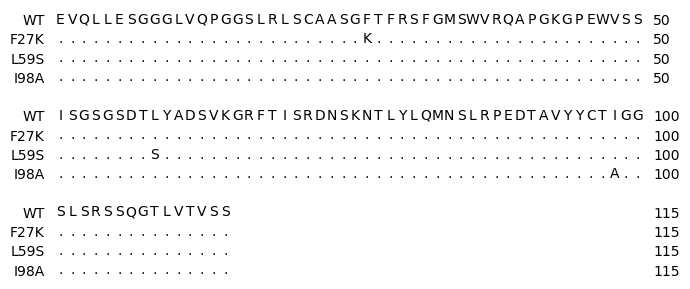

In [ ]:
from io import StringIO

import matplotlib.pyplot as plt
from biotite.sequence import GeneralSequence
from biotite.sequence.align import Alignment
from biotite.sequence.alphabet import LetterAlphabet
from biotite.sequence.graphics import plot_alignment_similarity_based
from biotite.sequence.io.fasta import FastaFile
from matplotlib.axes import Axes
from matplotlib.figure import Figure

# 사용자 정의 알파벳 생성 (기본 알파벳 + '.') - 전역 또는 함수 내에서 정의
CUSTOM_ALPHABET: LetterAlphabet = LetterAlphabet("ACDEFGHIKLMNPQRSTVWY.")


def parse_fasta(
    fasta_string: str, custom_alphabet: LetterAlphabet
) -> tuple[list[GeneralSequence], list[str]]:
    """
    FASTA 문자열을 파싱하여 GeneralSequence 객체 리스트와 헤더 리스트를 반환합니다.

    Args:
        fasta_string: FASTA 형식의 문자열.
        custom_alphabet: 시퀀스에 사용할 LetterAlphabet 객체.

    Returns:
        GeneralSequence 객체의 리스트와 헤더 문자열의 리스트를 담은 튜플.
    """
    fasta_io = StringIO(fasta_string)
    fasta_file = FastaFile.read(fasta_io)
    # fasta_file.values()는 시퀀스 문자열(str)을 반환
    sequences: list[GeneralSequence] = [
        GeneralSequence(custom_alphabet, seq) for seq in fasta_file.values()
    ]
    # fasta_file.keys()는 헤더 문자열(str)을 반환
    labels: list[str] = list(fasta_file.keys())
    return sequences, labels


def create_alignment(sequences: list[GeneralSequence]) -> Alignment:
    """
    GeneralSequence 객체 리스트를 기반으로 Alignment 객체를 생성합니다.

    Args:
        sequences: GeneralSequence 객체의 리스트.

    Returns:
        생성된 Alignment 객체.
    """
    # seq.symbols는 시퀀스의 심볼 표현(보통 문자열과 유사)을 반환
    trace = Alignment.trace_from_strings(
        [str(seq) for seq in sequences]
    )  # .symbols 대신 str() 사용 권장
    return Alignment(sequences, trace)


def replace_matches_with_dot(
    alignment: Alignment, custom_alphabet: LetterAlphabet, wt_index: int = 0
) -> list[GeneralSequence]:
    """
    WT 서열과 동일한 위치의 문자를 '.'으로 변경한 새로운 GeneralSequence 리스트를 반환합니다.

    Args:
        alignment: 원본 Alignment 객체.
        custom_alphabet: 변환된 시퀀스에 사용할 LetterAlphabet 객체.
        wt_index: WT 서열의 인덱스 (기본값: 0).

    Returns:
        변환된 GeneralSequence 객체의 리스트.
    """
    if not alignment.sequences:
        return []  # 빈 얼라인먼트 처리

    # alignment.sequences[wt_index]는 GeneralSequence 객체
    # str()을 사용하여 문자열 표현 얻기
    wt_sequence_str: str = str(alignment.sequences[wt_index])
    modified_sequence_strs: list[str] = [wt_sequence_str]  # WT 서열은 변경 없이 문자열로 추가

    # alignment.sequences[1:] 또한 GeneralSequence 객체 리스트
    for current_seq in alignment.sequences[1:]:  # F402 오류 방지
        modified_seq_chars: list[str] = []
        # str() 안의 변수 이름도 'current_seq'로 변경
        seq_str: str = str(current_seq)
        for wt_char, mut_char in zip(wt_sequence_str, seq_str):
            modified_seq_chars.append("." if wt_char == mut_char else mut_char)
        modified_sequence_strs.append("".join(modified_seq_chars))

    # 변환된 문자열 리스트로부터 GeneralSequence 객체 리스트 생성
    modified_sequences: list[GeneralSequence] = [
        GeneralSequence(custom_alphabet, seq_str) for seq_str in modified_sequence_strs
    ]
    return modified_sequences


def plot_alignment(
    modified_alignment: Alignment,
    labels: list[str],
    figsize: tuple[float, float] = (8.0, 3.0),
) -> None:
    """
    Alignment 객체를 기반으로 시각화를 수행합니다.

    Args:
        modified_alignment: 시각화할 Alignment 객체.
        labels: 각 시퀀스의 라벨 리스트.
        figsize: 그래프의 크기 (너비, 높이) 튜플 (기본값: (8.0, 3.0)).
    """
    # plt.subplots()는 Figure와 Axes(또는 Axes 배열) 객체를 반환
    fig: Figure
    ax: Axes
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor("white")  # Figure 배경색 설정
    ax.patch.set_facecolor("white")  # Axes 배경색 설정

    plot_alignment_similarity_based(
        axes=ax,  # Axes 객체 전달
        alignment=modified_alignment,  # Alignment 객체 전달
        symbols_per_line=50,
        show_numbers=True,
        labels=labels,  # 문자열 리스트 전달
        label_size=10,
        color_symbols=True,
        color="black",  # 색상 이름(str) 전달
    )

    plt.tight_layout()
    plt.show()


def run_alignment_pipeline(fasta_string: str, figsize: tuple[float, float] = (8.0, 3.0)) -> None:
    """
    전체 정렬 및 시각화 파이프라인을 실행합니다.

    Args:
        fasta_string: FASTA 형식의 문자열.
        figsize: 플롯의 크기 (너비, 높이) 튜플 (기본값: (8.0, 3.0)).
    """
    # FASTA 파싱 및 Alignment 생성
    sequences: list[GeneralSequence]
    labels: list[str]
    sequences, labels = parse_fasta(fasta_string, CUSTOM_ALPHABET)

    if not sequences:
        print("Error: No sequences found in the FASTA string.")
        return  # 시퀀스가 없으면 종료

    original_alignment: Alignment = create_alignment(sequences)

    # 서열 변환 실행 (첫 번째 서열이 WT)
    modified_sequences: list[GeneralSequence] = replace_matches_with_dot(
        original_alignment, custom_alphabet=CUSTOM_ALPHABET, wt_index=0
    )

    if not modified_sequences:
        print("Error: Could not modify sequences.")
        return  # 변환 실패 시 종료

    # 변환된 서열로 Alignment 재생성
    # create_alignment 함수는 GeneralSequence 리스트를 받으므로 그대로 사용 가능
    modified_alignment: Alignment = create_alignment(modified_sequences)

    # 플롯 생성
    plot_alignment(modified_alignment, labels, figsize)


# FASTA 문자열 정의 (첫 번째 서열이 WT)
fasta_string: str = """
>WT
EVQLLESGGGLVQPGGSLRLSCAASGFTFRSFGMSWVRQAPGKGPEWVSSISGSGSDTLYADSVKGRFTISRDNSKNTLYLQMNSLRPEDTAVYYCTIGGSLSRSSQGTLVTVSS
>F27K
EVQLLESGGGLVQPGGSLRLSCAASGKTFRSFGMSWVRQAPGKGPEWVSSISGSGSDTLYADSVKGRFTISRDNSKNTLYLQMNSLRPEDTAVYYCTIGGSLSRSSQGTLVTVSS
>L59S
EVQLLESGGGLVQPGGSLRLSCAASGFTFRSFGMSWVRQAPGKGPEWVSSISGSGSDTSYADSVKGRFTISRDNSKNTLYLQMNSLRPEDTAVYYCTIGGSLSRSSQGTLVTVSS
>I98A
EVQLLESGGGLVQPGGSLRLSCAASGFTFRSFGMSWVRQAPGKGPEWVSSISGSGSDTLYADSVKGRFTISRDNSKNTLYLQMNSLRPEDTAVYYCTAGGSLSRSSQGTLVTVSS
"""

run_alignment_pipeline(fasta_string, figsize=(7, 3))

### 항체 CDR 영역 시각화

[AbNumber](https://github.com/prihoda/AbNumber)는 [ANARCI](https://github.com/oxpig/ANARCI)(항원 수용체 번호 매기기 및 수용체 분류)를 사용하여 항체 번호 매기기와 정렬을 단순화하는 Python API입니다. 이는 번호 매기기, 정렬 및 인간화를 위한 도구를 제공함으로써 항체 연구 및 개발을 간소화합니다.


In [ ]:
import pandas as pd
from abnumber import Chain


def parse_fasta(fasta_string):
    """FASTA 문자열 파싱."""
    return [
        (entry.split("\n")[0].strip(), "".join(entry.split("\n")[1:]).strip())
        for entry in fasta_string.strip().split(">")[1:]
    ]


def extract_cdr_data(chain_seq):
    """주어진 시퀀스에서 CDR 데이터 추출."""
    chain_imgt = Chain(chain_seq, scheme="imgt", cdr_definition="imgt", assign_germline=True)
    chain_kabat = Chain(chain_seq, scheme="kabat", cdr_definition="kabat")

    chain_type = (
        "Heavy"
        if chain_imgt.is_heavy_chain()
        else "Kappa_light"
        if chain_imgt.is_kappa_light_chain()
        else "Lambda_light"
        if chain_imgt.is_lambda_light_chain()
        else "None"
    )

    return {
        "species": chain_imgt.species,
        "chain": chain_type,
        "germline": chain_imgt.v_gene,
        "imgt_CDR1": chain_imgt.cdr1_seq,
        "imgt_CDR2": chain_imgt.cdr2_seq,
        "imgt_CDR3": chain_imgt.cdr3_seq,
        "kabat_CDR1": chain_kabat.cdr1_seq,
        "kabat_CDR2": chain_kabat.cdr2_seq,
        "kabat_CDR3": chain_kabat.cdr3_seq,
        "full_sequence": chain_seq,
    }


fasta_string = """
>CBK51939
DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
>8AS0_C
DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQDYGLPFTFGQGTKVEIK
>7CGW_B
DIVMTQSPDSLAVSLGERATINCKSSESVSNDVAWYQQKPGQPPKLLINYAFHRFTGVPDRFSGSGYGTDFTLTISSLQAEDVAVYYCHQAYSSPYTFGQGTKLEIK
>5JXE_C
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
>5B8C_A
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
"""

seq = parse_fasta(fasta_string)
data = [{"id": seq_id, **extract_cdr_data(chain_seq)} for seq_id, chain_seq in seq]
df = pd.DataFrame(data)
df.head()

,id,species,chain,germline,imgt_CDR1,imgt_CDR2,imgt_CDR3,kabat_CDR1,kabat_CDR2,kabat_CDR3,full_sequence
0,CBK51939,human,Kappa_light,IGKV1D-16*01,QGISSW,AAS,QQYYSYPRT,RASQGISSWLA,AASSLQS,QQYYSYPRT,DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKS...
1,7WSL_L,human,Kappa_light,IGKV1-9*01,QDVGTA,WAS,QHYSSYPWT,KASQDVGTAVA,WASTLHT,QHYSSYPWT,DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKL...
2,8AS0_C,human,Kappa_light,IGKV1-39*01,QSISSY,AAS,QQDYGLPFT,RASQSISSYLN,AASSLQS,QQDYGLPFT,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...
3,7CGW_B,human,Kappa_light,IGKV4-1*01,ESVSND,YAF,HQAYSSPYT,KSSESVSNDVA,YAFHRFT,HQAYSSPYT,DIVMTQSPDSLAVSLGERATINCKSSESVSNDVAWYQQKPGQPPKL...
4,5JXE_C,human,Kappa_light,IGKV3-11*01,KGVSTSGYSY,LAS,QHSRDLPLT,RASKGVSTSGYSYLH,LASYLES,QHSRDLPLT,EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQ...


### CDR 표시한 단백질 서열 정렬 시각화


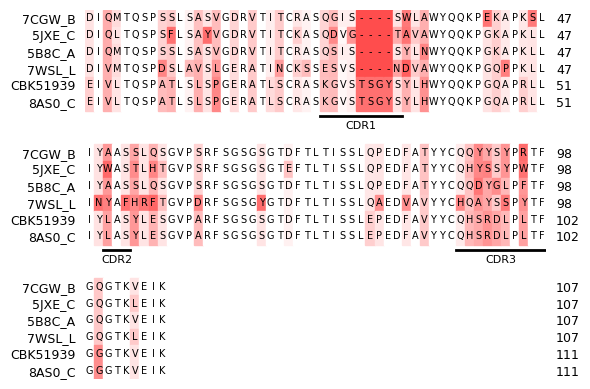

In [ ]:
import io

import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta
import matplotlib.pyplot as plt
import numpy as np
from biotite.application.clustalo import ClustalOmegaApp
from matplotlib.colors import LinearSegmentedColormap


def create_similarity_colormap():
    """시각화에 사용할 컬러맵 생성"""
    return LinearSegmentedColormap.from_list("similarity_cmap", [(1.0, 0.3, 0.3), (1.0, 1.0, 1.0)])


def plot_sequence_features(ax, alignment, features, num_sequences, line_length, spacing):
    """서열 특징 정보를 시각화하는 도우미 함수"""
    for row_index in range(1 + len(alignment) // line_length):
        row_start = line_length * row_index
        row_end = min(line_length * (row_index + 1), len(alignment))

        seq_start = alignment.trace[row_start, 1]
        seq_end = alignment.trace[row_end - 1, 1] + 1
        base_y = (num_sequences + spacing) * row_index + num_sequences

        for feat_name, (feat_start, feat_end) in features.items():
            start = feat_start - 1
            end = feat_end

            if start < seq_end and end > seq_start:
                x_start = np.clip(start - seq_start, 0, line_length)
                x_end = np.clip(end - seq_start, 0, line_length)
                x_center = (x_start + x_end) / 2

                # 특징 표시 선 및 텍스트
                ax.plot(
                    [x_start, x_end],
                    [base_y + 0.3] * 2,
                    color="black",
                    linewidth=2,
                    clip_on=False,
                )
                ax.text(
                    x_center,
                    base_y + 0.6,
                    feat_name,
                    fontsize=8,
                    va="top",
                    ha="center",
                )


def perform_alignment(sequences, use_input_order):
    """서열 정렬 수행 함수"""
    if len(sequences) == 2:
        matrix = align.SubstitutionMatrix.std_protein_matrix()
        alignments, _ = align.align_optimal(
            sequences[0],
            sequences[1],
            matrix=matrix,
            gap_penalty=-10,
            terminal_penalty=False,
        )
        return alignments, [0, 1]
    else:
        app = ClustalOmegaApp(sequences)
        app.start()
        app.join()
        return app.get_alignment(), app.get_alignment_order()


def visualize_alignment_with_features(
    fasta_string: str,
    sequence_features: dict[str, tuple[int, int]] | None = None,
    use_input_sequence_order: bool = True,
    figure_size: tuple[int, int] = (8, 4),
    sequence_line_length: int = 40,
    feature_spacing: int = 3,
) -> None:
    """
    FASTA 서열 정렬 및 특징 시각화 함수

    Parameters:
    fasta_string: FASTA 형식의 서열 문자열
    sequence_features: 첫 번째 서열의 특징 위치 정보 (시작, 끝)
    use_input_sequence_order: 입력 순서 유지 여부
    figure_size: 출력 이미지 크기 (가로, 세로)
    sequence_line_length: 줄당 표시할 서열 길이
    feature_spacing: 특징 표시 간격
    """

    # FASTA 데이터 파싱
    fasta_file = io.StringIO(fasta_string)
    seq_dict = fasta.get_sequences(fasta.FastaFile.read(fasta_file))
    sequences = list(seq_dict.values())
    seq_ids = list(seq_dict.keys())

    # 서열 정렬 수행
    alignments, order = perform_alignment(sequences, use_input_sequence_order)
    ordered_ids = [seq_ids[i] for i in order]

    # 시각화 설정
    fig, ax = plt.subplots(figsize=figure_size)
    colormap = create_similarity_colormap()

    # 정렬 결과 플롯
    graphics.plot_alignment_similarity_based(
        ax,
        alignments,
        matrix=align.SubstitutionMatrix.std_protein_matrix(),
        symbols_per_line=sequence_line_length,
        labels=ordered_ids,
        show_numbers=True,
        cmap=colormap,
        label_size=9,
        number_size=9,
        symbol_size=7,
        spacing=feature_spacing,
    )

    # 특징 정보 표시
    if sequence_features:
        plot_sequence_features(
            ax,
            alignments,
            sequence_features,
            len(sequences),
            sequence_line_length,
            feature_spacing,
        )

    plt.tight_layout()
    plt.show()


# 사용 예시
fasta_sequence_data = """
>CBK51939
DIQMTQSPSSLSASVGDRVTITCRASQGISSWLAWYQQKPEKAPKSLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQYYSYPRTFGQGTKVEIK
>7WSL_L
DIQLTQSPSFLSAYVGDRVTITCKASQDVGTAVAWYQQKPGKAPKLLIYWASTLHTGVPSRFSGSGSGTEFTLTISSLQPEDFATYYCQHYSSYPWTFGQGTKLEIK
>8AS0_C
DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQDYGLPFTFGQGTKVEIK
>7CGW_B
DIVMTQSPDSLAVSLGERATINCKSSESVSNDVAWYQQKPGQPPKLLINYAFHRFTGVPDRFSGSGYGTDFTLTISSLQAEDVAVYYCHQAYSSPYTFGQGTKLEIK
>5JXE_C
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
>5B8C_A
EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
"""

first_sequence_features = {
    "CDR1": (27, 35),
    "CDR2": (50, 52),
    "CDR3": (89, 98),
}

visualize_alignment_with_features(
    fasta_sequence_data,
    sequence_features=first_sequence_features,
    figure_size=(6, 4),
    sequence_line_length=51,
    feature_spacing=2,
)

### CDR 서열 로고 시각화

CDR 서열 로고는 항체 또는 T 세포 수용체의 상보성 결정 영역(CDR) 서열을 시각적으로 표현하는 데 사용됩니다.CDR 서열 로고는 다음과 같은 여러 가지 이점을 제공합니다.

- 시각적 요약: 긴 CDR 서열의 핵심 특징과 다양성을 한눈에 파악할 수 있습니다.
- 보존된 모티프 식별: 특정 위치에서 빈번하게 나타나는 아미노산 잔기를 강조하여 기능적으로 중요한 모티프를 식별하는 데 도움을 줍니다.
- 서열 비교: 여러 CDR 서열 그룹의 로고를 비교하여 다양성 패턴과 보존된 영역의 차이를 시각적으로 확인할 수 있습니다.

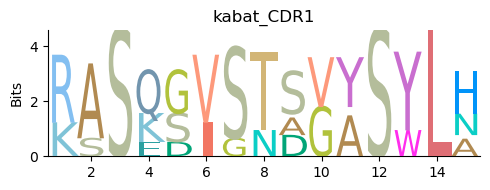

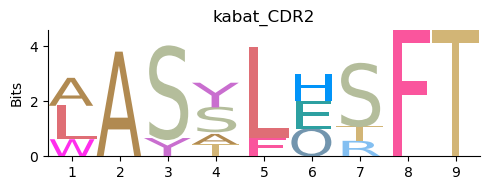

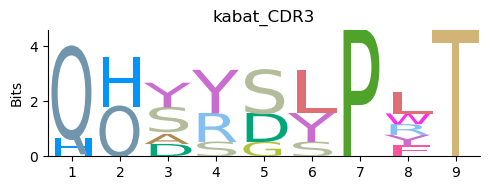

In [ ]:
import io

import biotite.application.clustalo as clustalo
import biotite.sequence as seq
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta
import matplotlib.pyplot as plt
import pandas as pd  # pandas 라이브러리 추가


def visualize_sequence_logo(fasta_string, title, figsize=(6, 3)):
    """
    주어진 FASTA 문자열로부터 시퀀스 로고를 생성하고 시각화합니다.

    Args:
        fasta_string (str): FASTA 형식의 서열 문자열.
    """

    # FASTA 문자열을 시퀀스 딕셔너리로 변환
    fasta_file = io.StringIO(fasta_string)
    fasta_sequences = fasta.FastaFile.read(fasta_file)
    sequences_dict = fasta.get_sequences(fasta_sequences)

    # 다중 서열 정렬 (MSA) 생성
    alignment = clustalo.ClustalOmegaApp.align(list(sequences_dict.values()))

    # 시퀀스 프로파일 생성
    profile = seq.SequenceProfile.from_alignment(alignment)

    # 시퀀스 로고 플롯
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    graphics.plot_sequence_logo(ax, profile, scheme="flower")

    # 플롯 설정
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Bits")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    fig.tight_layout()

    plt.show()


def dataframe_to_fasta(df, id_col="id", seq_col="kabat_CDR1"):
    """데이터프레임을 FASTA 형식의 문자열로 변환합니다."""
    return "".join(f">{row[id_col]}\n{row[seq_col]}\n" for _, row in df.iterrows())


cdr_regions = ["kabat_CDR1", "kabat_CDR2", "kabat_CDR3"]

for cdr in cdr_regions:
    fasta_string = dataframe_to_fasta(df, seq_col=cdr)
    visualize_sequence_logo(fasta_string, title=cdr, figsize=(5, 2))

### 단백질 서열에 에피토프 매핑 데이터 시각화

펩타이드 어레이 실험을 통애 얻은 에피토프에 대한 정보를 단백질 서열에 시각화해봅니다. 이 예시에서는 스크리닝된 항원의 색상 코딩된 서열 정렬 표현을 사용하여 두 가지 에피토프 매핑 연구의 데이터를 사용하겠습니다. 스크리닝된 항원은 말라리아 원충(Plasmodium falciparum)의 병독성 인자인 VAR2CSA의 세포외 도메인에 걸쳐 있으며 FCR3 (1-2659번 잔기)와 NF54 (1-2652번 잔기)에 해당합니다.

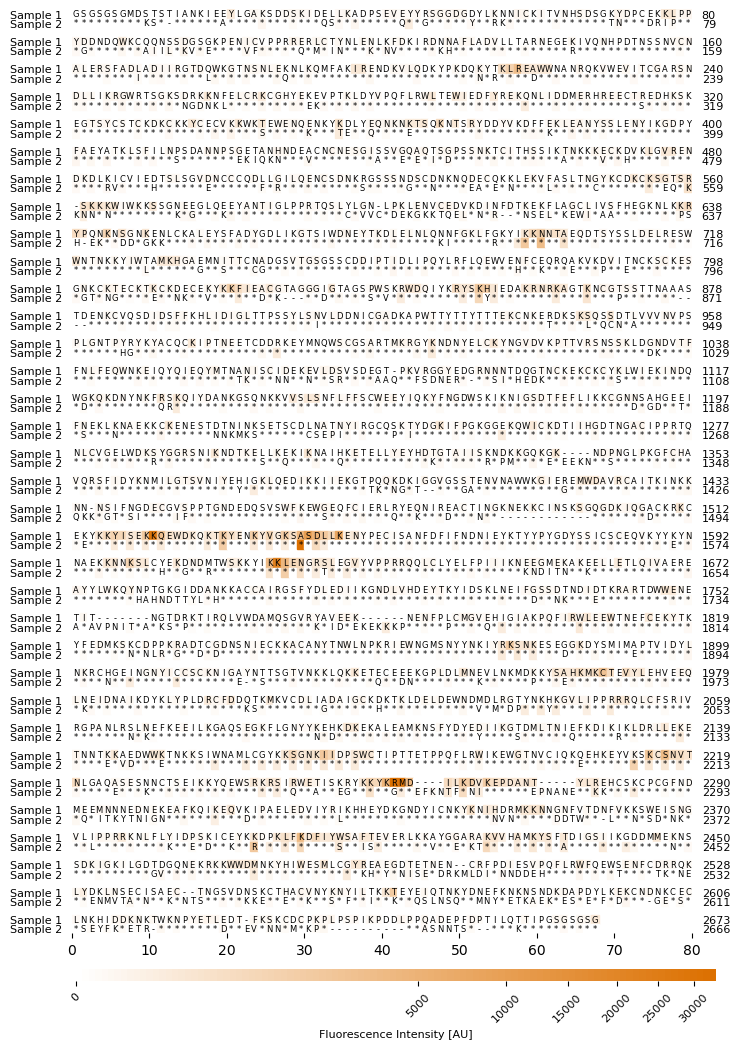

<Figure size 640x480 with 0 Axes>

In [ ]:
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.sequence.io.fasta as fasta
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def process_epitope_mapping(
    array_seq_path,
    sample1_file_path,
    sample2_file_path,
    pep_len=20,
    score_res=20,
    combine_method="max",
    threshold=0,
    overlap_step=1,
    label_size=8,
    number_size=8,
    symbol_size=4,
    cbar_label_size=8,
    cbar_tick_size=8,
):
    """
    에피토프 매핑 데이터를 처리하고 시각화합니다.

    Args:
        array_seq_path (str): Array_Seq.txt 파일 경로.
        sample1_file_path (str): 첫 번째 샘플 에피토프 스캔 데이터 CSV 파일 경로.
        sample2_file_path (str): 두 번째 샘플 에피토프 스캔 데이터 CSV 파일 경로.
        pep_len (int, optional): 펩타이드 길이. 기본값은 20.
        score_res (int, optional): 점수 잔기 위치. 기본값은 20.
        combine_method (str, optional): 점수 결합 방식 ("max" 또는 "mean"). 기본값은 "max".
        threshold (int, optional): 신호 점수에 대한 임계값. 기본값은 0.
        overlap_step (int, optional): 중첩 펩타이드의 스텝 크기. 기본값은 1.
        label_size (int, optional): 축 레이블 크기. 기본값은 8.
        number_size (int, optional): 서열 번호 크기. 기본값은 8.
        symbol_size (int, optional): 서열 글자 크기. 기본값은 4.
        cbar_label_size (int, optional): 컬러바 레이블 크기. 기본값은 8.
        cbar_tick_size (int, optional): 컬러바 눈금 크기. 기본값은 8.

    Returns:
        None: 결과를 시각적으로 표시합니다.
    """

    # 에피토프 스캔 데이터 처리 함수
    def read_scan(filename, peptide_length=20, score_residue=20):
        """파일에서 에피토프 스캔 데이터를 읽어와 처리합니다."""
        if not isinstance(peptide_length, int):
            raise TypeError("peptide_length: 정수만 허용됩니다.")
        elif not isinstance(score_residue, int):
            raise TypeError("score_residue: 정수만 허용됩니다.")
        elif peptide_length < score_residue:
            raise ValueError("score_residue는 peptide_length보다 클 수 없습니다.")

        s = (
            (score_residue) - peptide_length - 1
            if peptide_length != 20 or score_residue != 20
            else -1
        )

        df = pd.read_csv(filename)
        score_residues = df["Seq"].str[s]
        df["s_res"] = score_residues
        return df

    # 복제 점수 결합 함수
    def combine_scores(dataframe, combine="max", flag_noisy=True):
        """복제된 점수를 결합하고 노이즈가 있는 데이터를 표시합니다."""
        df = dataframe.copy()
        df["ave"] = df[["r1", "r2"]].mean(axis=1)
        df["avedev"] = ((df.r1 - df.ave).abs() + (df.r2 - df.ave).abs()) / 2
        df["dev_ratio"] = df.apply(lambda x: 0 if x.avedev == 0 else x.avedev / x.ave, axis=1)

        if combine == "max":
            df["comb_signal"] = df.apply(
                lambda x: max(x.r1, x.r2) if x.dev_ratio >= 0.4 else x.ave, axis=1
            )
        elif combine == "mean":
            df["comb_signal"] = df.apply(lambda x: x.ave if x.dev_ratio <= 0.4 else 0, axis=1)

        if flag_noisy:
            df["flag"] = df.apply(lambda x: 0 if x.dev_ratio <= 0.4 else 1, axis=1)
        return df

    # 데이터 변환 함수
    def data_transform(dataframe, threshold=0):
        """데이터프레임의 신호 값을 변환합니다."""
        df = dataframe.copy()
        t = threshold
        df["cubic"] = df.apply(lambda x: np.cbrt(max(0, x.comb_signal - t)), axis=1)
        df["signal_plot"] = df.apply(lambda x: x.cubic / df["cubic"].max(), axis=1)
        return df

    # 갭 서열 생성 함수
    def gapped_seq(dataframe, seq_trace, peptide_length, overlap_step=1):
        """정렬 추적과 연결하는 갭 서열을 생성합니다."""
        template = seq_trace
        df = dataframe
        _step = overlap_step
        gapped = list(zip(df.s_res, df.signal_plot))
        lk1 = df["s_res"].values.tolist()
        plen = peptide_length

        x, b, c, p = 0, 0, 0, 0
        for b in range(len(lk1)):
            for a in template[x:]:
                if c < plen - 1:
                    if a is None:
                        gapped.insert(x, (template[x], 0))
                        x += 1
                    elif a != lk1[b]:
                        gapped.insert(x, (template[x], 0))
                        x += 1
                        c += 1
                    elif p == 0:
                        gapped.insert(x, (template[x], 0))
                        x += 1
                        c += 1
                    else:
                        x += 1
                        c += 1
                        break
                else:
                    c = 0
                    p += 1
                    x += 1
                    break

        # 끝 부분의 갭 처리
        if len(gapped) < len(template) and template[len(gapped) + 1] is None:
            gapped_tail = [("None", 0)] * (len(template) - len(gapped))
            gapped.extend(gapped_tail)

        return gapped

    # 신호 맵 생성 함수
    def signal_map(gapped_seq1, gapped_seq2):
        """두 갭 서열에서 신호 점수의 매핑을 생성합니다."""
        if gapped_seq1 is None or gapped_seq2 is None:
            return None
        gapd_s1 = gapped_seq1
        gapd_s2 = gapped_seq2
        fl_score = np.zeros((len(gapd_s1), 2))

        for v1 in range(len(gapd_s1)):
            fl_score[v1, 0] = gapd_s1[v1][1]
            fl_score[v1, 1] = gapd_s2[v1][1]

        return fl_score

    def draw_colorbar(
        axes,
        array1,
        array2,
        colormap,
        orient=None,
        title=None,
        label_size=10,
        tick_size=10,
    ):
        """주어진 축에 컬러바를 그립니다."""
        df1 = array1
        df2 = array2
        cmp = colormap
        ax = axes
        orientation = orient
        label = title

        vmiA = df1["comb_signal"].min() if "comb_signal" in df1 else 0
        vmiB = df2["comb_signal"].min() if "comb_signal" in df2 else 0
        vmxA = df1["comb_signal"].max() if "comb_signal" in df1 else 1
        vmxB = df2["comb_signal"].max() if "comb_signal" in df2 else 1

        norm = mpl.colors.PowerNorm(gamma=0.33, vmin=min(vmiA, vmiB), vmax=max(vmxA, vmxB))

        fig = mpl.pyplot.figure()
        cbar = fig.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap=cmp),
            cax=ax,
            orientation=orientation,
            label=label,
        )
        cbar.ax.tick_params(labelsize=tick_size)
        cbar.ax.set_xlabel(cbar.ax.get_xlabel(), fontsize=label_size)
        return cbar

    # 1. 데이터 로드 및 전처리
    sample1_scan = read_scan(sample1_file_path, pep_len, score_res)
    sample2_scan = read_scan(sample2_file_path, pep_len, score_res)

    # 2. 복제 점수 결합 및 노이즈 처리
    dfa = (
        combine_scores(sample1_scan, combine=combine_method, flag_noisy=True)
        if sample1_scan is not None
        else None
    )
    dfb = (
        combine_scores(sample2_scan, combine=combine_method, flag_noisy=True)
        if sample2_scan is not None
        else None
    )

    # 3. 데이터 변환 (큐빅 지수 사용)
    if dfa is not None:
        dfa = data_transform(dfa, threshold=threshold)
    if dfb is not None:
        dfb = data_transform(dfb, threshold=threshold)

    # 4. FASTA 파일 읽기 및 서열 정렬
    fasta_file = fasta.FastaFile.read(array_seq_path)

    # FCR3와 NF54 단백질 서열 파싱 (추출)
    sequences = []
    for sequence in fasta_file.values():
        sequences.append(seq.ProteinSequence(sequence))

    matrix = align.SubstitutionMatrix.std_protein_matrix()
    alignments = []

    for i in range(len(sequences)):
        for j in range(i + 1, len(sequences)):
            alignment = align.align_optimal(
                sequences[i],
                sequences[j],
                matrix,
                gap_penalty=(-10, -1),
                terminal_penalty=False,
            )
            alignments.append(alignment[0])

    # 5. 갭 서열 생성
    trace_a = align.get_symbols(alignments[0])[0]
    trace_b = align.get_symbols(alignments[0])[1]

    gapd_s1 = (
        gapped_seq(dfa, trace_a, pep_len, overlap_step)
        if dfa is not None and trace_a is not None
        else None
    )
    gapd_s2 = (
        gapped_seq(dfb, trace_b, pep_len, overlap_step)
        if dfb is not None and trace_b is not None
        else None
    )

    # 6. 신호 맵 생성
    score = signal_map(gapd_s1, gapd_s2) if gapd_s1 is not None and gapd_s2 is not None else None

    # 7. 시각화
    fig = plt.figure(figsize=(8, 12))
    ax = fig.add_subplot(111)
    if score is not None:
        graphics.plot_alignment_array(
            ax,
            alignments[0],
            fl_score=score,
            labels=["Sample 1", "Sample 2"],
            show_numbers=True,
            symbols_per_line=80,
            show_line_position=True,
            label_size=label_size,
            number_size=number_size,
            symbol_size=symbol_size,
        )

        ax2 = fig.add_axes([0.13, 0.07, 0.8, 0.01])
        ax2.set_frame_on(False)

        colormap = graphics.ArrayPlotter(ax2, score).get_cmap()

        if dfa is not None and dfb is not None and colormap is not None:
            cbar = draw_colorbar(
                ax2,
                dfa,
                dfb,
                colormap,
                orient="horizontal",
                title="Fluorescence Intensity [AU]",
                label_size=cbar_label_size,
                tick_size=cbar_tick_size,
            )

            labels = cbar.ax.get_xticklabels()
            plt.setp(
                labels,
                rotation=45,
                horizontalalignment="center",
                fontsize=cbar_tick_size,
            )


# 사용 예시
array_seq_path = "../../input/Array_Seq.txt"
sample1_file_path = "../../input/FCR3_10ug.csv"
sample2_file_path = "../../input/NF54_10ug.csv"

process_epitope_mapping(
    array_seq_path,
    sample1_file_path,
    sample2_file_path,
    label_size=8,
    number_size=8,
    symbol_size=6,
    cbar_label_size=8,
    cbar_tick_size=8,
)

## 단백질 구조 분석 관련

### 이차구조 시각화

단백질 서열에 대한 이차 구조 예측은 [s4pred](https://github.com/psipred/s4pred)에서 계산된 것입니다.

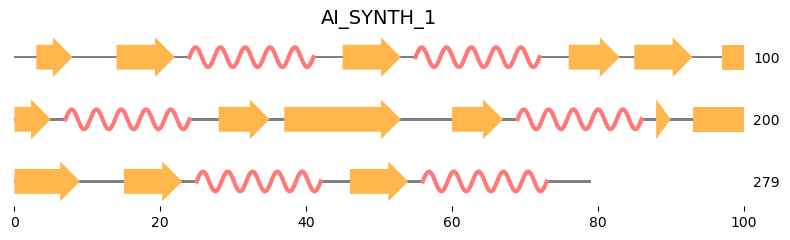

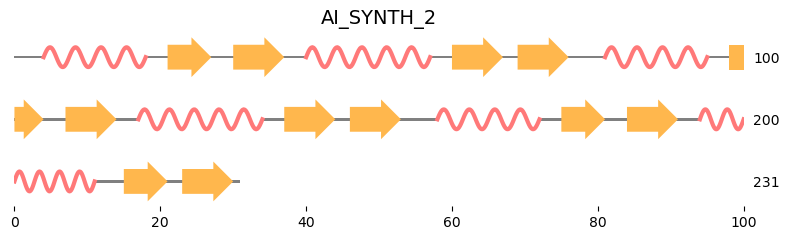

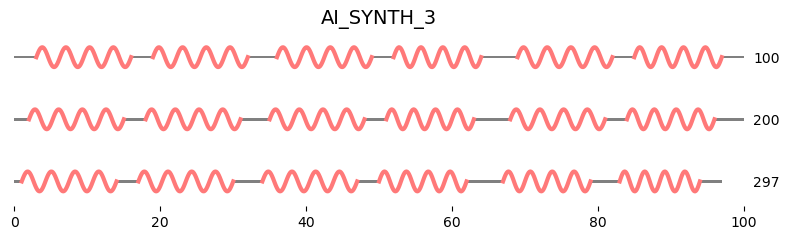

In [ ]:
import biotite
import biotite.sequence as seq
import biotite.sequence.graphics as graphics
import matplotlib.pyplot as plt
import numpy as np
from biotite.sequence import Annotation, Feature, Location
from biotite.sequence.graphics import plot_feature_map
from matplotlib.patches import Rectangle


## 헬릭스 구조를 그리는 클래스
class HelixPlotter(graphics.FeaturePlotter):
    def matches(self, feature):
        return feature.key == "SecStr" and feature.qual.get("sec_str_type") == "helix"

    def draw(self, axes, feature, bbox, loc, style_param):
        n_turns = np.ceil((loc.last - loc.first + 1) / 3.6)
        x_val = np.linspace(0, n_turns * 2 * np.pi, 100)
        y_val = (-0.4 * np.sin(x_val) + 1) / 2

        x_val = x_val * bbox.width / (n_turns * 2 * np.pi) + bbox.x0
        y_val = y_val * bbox.height + bbox.y0

        background = Rectangle(bbox.p0, bbox.width, bbox.height, color="white", linewidth=0)
        axes.add_patch(background)
        axes.plot(x_val, y_val, linewidth=3, color="#FF7979")  # 부드러운 붉은색


## 시트 구조를 그리는 클래스
class SheetPlotter(graphics.FeaturePlotter):
    def __init__(self, head_width=0.8, tail_width=0.5):
        self._head_width = head_width
        self._tail_width = tail_width

    def matches(self, feature):
        return feature.key == "SecStr" and feature.qual.get("sec_str_type") == "sheet"

    def draw(self, axes, feature, bbox, loc, style_param):
        x, y = bbox.x0, bbox.y0 + bbox.height / 2
        dx, dy = bbox.width, 0

        draw_head = not (loc.defect & seq.Location.Defect.MISS_RIGHT)

        axes.add_patch(
            biotite.AdaptiveFancyArrow(
                x,
                y,
                dx,
                dy,
                self._tail_width * bbox.height,
                self._head_width * bbox.height,
                head_ratio=0.5,
                draw_head=draw_head,
                color="#FFB74D",
                linewidth=0,
            )
        )


## 2차 구조를 시각화하는 함수
def visualize_secondary_structure(sse, first_id, seq_name):
    def _add_sec_str(annotation, first, last, str_type):
        if str_type in ["a", "b"]:
            feature = Feature(
                "SecStr",
                [Location(first, last)],
                {"sec_str_type": "helix" if str_type == "a" else "sheet"},
            )
            annotation.add_feature(feature)

    annotation = Annotation()
    curr_start = None
    for i, curr_sse in enumerate(sse):
        if curr_start is None:
            curr_start = i
        elif curr_sse != sse[i - 1]:
            _add_sec_str(annotation, curr_start + first_id, i - 1 + first_id, sse[i - 1])
            curr_start = i
    _add_sec_str(annotation, curr_start + first_id, i + first_id, curr_sse)

    # 서열 길이에 따라 피겨의 높이 계산
    symbols_per_line = 100  # 줄당 서열의 수
    num_lines = -(-len(sse) // symbols_per_line)  # 올림 나눗셈
    fig_height = 1 + num_lines * 0.5  # 기본 높이 1에 줄 수에 따라 높이 추가

    fig, ax = plt.subplots(figsize=(8.0, fig_height))
    plot_feature_map(
        ax,
        annotation,
        symbols_per_line=symbols_per_line,
        loc_range=(first_id, first_id + len(sse)),
        show_numbers=True,
        show_line_position=True,
        feature_plotters=[HelixPlotter(), SheetPlotter()],
    )

    # 서열 이름을 플롯의 제목으로 추가
    plt.title(seq_name, fontsize=14)

    fig.tight_layout()
    plt.show()


# 입력 문자열 파싱 및 2차 구조 시각화
input_string = """
>AI_SYNTH_1
MSEIQVRLNPDDGSKFEYTYTITTESELEKVLNELMDYIKKQGAKRVRISITARTKKEAEKFAAILIKVFAELGYNDINVTFDGDTVTVEGQLQGAKRVRISITARTKKEAEKFAAILIKVFAELGYNDINVTFDGDTVTVEGQLMSEIQVRLNPDDGSKFEYTYTITTESELEKVLNELMDYIKKNVTFDGDTVTVEGQLMSEIQVRLNPDDGSKFEYTYTITTESELEKVLNELMDYIKKQGAKRVRISITARTKKEAEKFAAILIKVFAELGYNDI
CCCEEEEECCCCCCEEEEEEEECCHHHHHHHHHHHHHHHHHCCCCEEEEEEEECCHHHHHHHHHHHHHHHHHCCCCEEEEEEECCEEEEEEEECCCCEEEEEEEECCHHHHHHHHHHHHHHHHHCCCCEEEEEEECCEEEEEEEEEEEEEEEECCCCCCCEEEEEEECCHHHHHHHHHHHHHHHHHCCEECCCEEEEEEEEEEEEEEEECCCCCCEEEEEEEECCHHHHHHHHHHHHHHHHHCCCCEEEEEEEECCHHHHHHHHHHHHHHHHHCCCCCC
>AI_SYNTH_2
GSMRQEKVLKSIEETVRKMDVTMETHRSGNEVKVVIKGLHESQQEQLKKDVEETSKKQGVETRIEFHGDTVTIVVREGSMRQEKVLKSIEETVRKMDVTMETHRSGNEVKVVIKGLHESQQEQLKKDVEETSKKQGVETRIEFHGDTVTIVVREGSMRQEKVLKSIEETVRKMDVTMETHRSGNEVKVVIKGLHESQQEQLKKDVEETSKKQGVETRIEFHGDTVTIVVRE
CCCCHHHHHHHHHHHHHHCCCEEEEEECCCEEEEEEECCCHHHHHHHHHHHHHHHHHCCCEEEEEEECCEEEEEEECCCCCHHHHHHHHHHHHHHCCCEEEEEECCCEEEEEEECCCHHHHHHHHHHHHHHHHHCCCEEEEEEECCEEEEEEECCCCCHHHHHHHHHHHHHHCCCEEEEEECCCEEEEEEECCCHHHHHHHHHHHHHHHHHCCCCEEEEEECCEEEEEEEC
>AI_SYNTH_3
GKSPTEVLLELIAEASGTTREEVKEKFLKELRKGKSPTEVLLELIAEASGTTKEEVKEKFLKELSFGKSPTEVLLELIAEASGTTKEEVKKKFWKELSLGKSPTEVLLELIAEASGTTREEVKEKFLKELRKGKSPTEVLLELIAEASGTTKEEVKEKFLKELSFGKSPTEVLLELIAEASGTTKEEVKKKFWKELSLGKSPTEVLLELIAEASGTTREEVKEKFLKELRKGKSPTEVLLELIAEASGTTKEEVKEKFLKELSFGKSPTEVLLELIAEASGTTKEEVKKKFWKELSL
CCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHCCCHHHHHHHHHHHHCCCCCHHHHHHHHHHHHCCCCHHHHHHHHHHHCCC
"""

# 입력 문자열에서 서열 정보 추출
sequences = {}
for line in input_string.strip().split("\n"):
    if line.startswith(">"):
        current_seq = line[1:]
        sequences[current_seq] = []
    else:
        sequences[current_seq].append(line)

# DSSP 표기법을 ABC 표기법으로 변환
dssp_to_abc = {"H": "a", "E": "b", "C": "c"}

# 각 서열에 대해 2차 구조 시각화
for seq_name, seq_data in sequences.items():
    sequence, sse = seq_data
    sse = np.array([dssp_to_abc[e] for e in sse], dtype="U1")
    visualize_secondary_structure(sse, 1, seq_name)

### 라마찬드란 플롯 (Ramachandran Plot)

아래 코드는 스크립트는 라마찬드란 플롯을 생성합니다. 라마찬드란 플롯은 단백질 구조 분석에 사용되는 중요한 그래프입니다. 단백질을 구성하는 아미노산 잔기의 회전각(dihedral angle) 중 두 가지, 즉 파이(φ, phi) 각과 싸이(ψ, psi) 각의 가능한 조합을 시각적으로 나타냅니다.

- 파이(φ) 각: 하나의 아미노산 잔기 내에서 질소 원자(N)와 알파 탄소 원자(Cα) 사이의 결합을 축으로 하는 회전각입니다. 이전 아미노산의 카르보닐 탄소(C')와 현재 아미노산의 아미노 질소(N)로 정의됩니다.
- 싸이(ψ) 각: 하나의 아미노산 잔기 내에서 알파 탄소 원자(Cα)와 카르보닐 탄소 원자(C') 사이의 결합을 축으로 하는 회전각입니다. 현재 아미노산의 알파 탄소(Cα)와 카르보닐 탄소(C') 그리고 다음 아미노산의 아미노 질소(N)로 정의됩니다.

이 두 각도의 조합은 폴리펩타이드 사슬의 국소적인 형태, 즉 2차 구조에 큰 영향을 미칩니다. 라마찬드란 플롯은 이론적으로 가능한 파이-싸이 각도 조합 중에서 실제로 단백질 구조에서 관찰되는 각도 분포를 보여줍니다.

#### 플롯의 의미:

- 플롯 상의 점 하나는 단백질 내의 하나의 아미노산 잔기에 해당하며, 그 점의 위치는 해당 잔기의 파이 각과 싸이 각 값을 나타냅니다.
- 플롯에는 일반적으로 허용된 영역(allowed regions)과 금지된 영역(disallowed regions)이 표시됩니다. 이는 아미노산의 입체적인 충돌 때문에 특정 각도 조합이 불가능하거나 매우 드물게 나타나기 때문입니다.
- 알파-나선(alpha-helix) 구조를 갖는 아미노산 잔기들은 플롯의 특정 영역에 집중되어 나타납니다.
- 베타-병풍(beta-sheet) 구조를 갖는 아미노산 잔기들은 또 다른 특정 영역에 집중되어 나타납니다.
- 기타 구조(예: 루프, 턴)를 갖는 잔기들은 플롯의 다양한 영역에 분포할 수 있습니다.

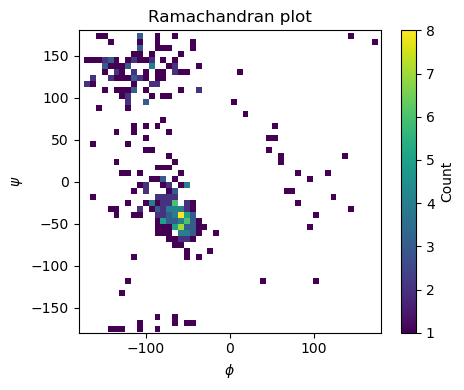

In [ ]:
from tempfile import gettempdir

import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.structure.io as strucio
import matplotlib.pyplot as plt
import numpy as np

# 단백질 구조 데이터 다운로드 및 처리
file = rcsb.fetch("3av0", "cif", gettempdir())
atom_array = strucio.load_structure(file)
peptide = atom_array[struc.filter_amino_acids(atom_array)]
chain = peptide[peptide.chain_id == "B"]

# 이면각 계산
phi, psi, omega = struc.dihedral_backbone(chain)
phi, psi = np.rad2deg(phi)[1:-1], np.rad2deg(psi)[1:-1]

# 라마찬드란 플롯 생성
figure, ax = plt.subplots(figsize=(5, 4))
h, xed, yed, image = ax.hist2d(phi, psi, bins=(50, 50), cmap="viridis", cmin=1)

# 컬러바 설정
cbar = figure.colorbar(image, orientation="vertical")
cbar.set_label("Count")

# 플롯 스타일 설정
ax.set_aspect("equal")
ax.set_xlim(-180, 180)
ax.set_ylim(-180, 180)
ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$\psi$")
ax.set_title("Ramachandran plot")

# 플롯 표시
plt.tight_layout()
plt.show()

### 인접 행렬(adjacency matrix) 시각화하기

인접 행렬(Adjacency Matrix)은 그래프 이론에서 사용되는 개념으로 그래프 내의 노드(vertex)들이 서로 어떻게 연결되어 있는지(adjacent)를 나타내는 정사각 행렬입니다. 생물학, 특히 단백질 구조 분석에서는 원자 또는 아미노산 잔기를 노드로 간주하고 특정 기준(예: 거리)에 따라 서로 연결되어 있다고 정의할 때 유용하게 활용할 수 있습니다.

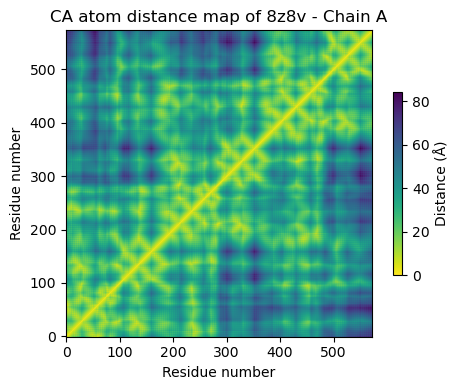

In [ ]:
from tempfile import gettempdir

import biotite
import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.structure.io as strucio
import matplotlib.pyplot as plt
import numpy as np


def download_and_load_structure(pdb_id):
    """PDB ID를 이용하여 단백질 구조를 다운로드하고 Biotite Structure 객체로 로드합니다."""
    file_name = rcsb.fetch(pdb_id, "cif", gettempdir())
    array = strucio.load_structure(file_name)
    return array


def select_ca_atoms(structure, chain_id):
    """Biotite Structure 객체에서 특정 chain ID의 CA (알파 탄소) 원자만 선택합니다."""
    chain = structure[structure.chain_id == chain_id]
    ca = chain[chain.atom_name == "CA"]
    return ca


def calculate_distance_matrix(atom_array):
    """Biotite AtomArray에서 CA 원자 간의 거리 행렬을 계산합니다."""
    coords = atom_array.coord
    n_atoms = coords.shape[0]
    distances = np.zeros((n_atoms, n_atoms))
    for i in range(n_atoms):
        for j in range(i, n_atoms):
            dist = np.linalg.norm(coords[i] - coords[j])
            distances[i, j] = dist
            distances[j, i] = dist
    return distances


def visualize_distance_matrix(distance_matrix, title="CA atom distance map", cmap="viridis_r"):
    """행렬을 컬러맵을 사용하여 시각화하고 컬러바를 추가합니다."""
    fig, ax = plt.subplots(figsize=(5, 4))  # 컬러바 공간 고려하여 figsize 조정
    im = ax.imshow(distance_matrix, cmap=cmap, origin="lower")

    # 컬러바 크기 줄이기
    cbar = fig.colorbar(im, ax=ax, shrink=0.6)
    cbar.set_label("Distance (Å)")

    ax.xaxis.tick_bottom()
    ax.set_aspect("equal")
    ax.set_xlabel("Residue number")
    ax.set_ylabel("Residue number")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()


pdb_id = "8z8v"
chain_id = "A"

structure = download_and_load_structure(pdb_id)
ca_atoms = select_ca_atoms(structure, chain_id)
distance_matrix = calculate_distance_matrix(ca_atoms)
visualize_distance_matrix(
    distance_matrix, title=f"CA atom distance map of {pdb_id} - Chain {chain_id}"
)

### 단백질의 지름 측정

아래 코드는 단백질의 지름을 최대 원자 간 쌍 거리로 정의하여 계산합니다. 이는 단백질 내에 존재하는 모든 원자 쌍 사이의 거리를 계산한 후, 그 중 가장 큰 거리를 단백질의 지름으로 정의하는 방식입니다.

In [ ]:
from tempfile import gettempdir

import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.structure.io as strucio
import numpy as np


def get_diameter(pdb_id):
    # PDB 파일 다운로드
    file_name = rcsb.fetch(pdb_id, "bcif", gettempdir())
    atom_array = strucio.load_structure(file_name)

    # 아미노산만 남기고 나머지 제거
    atom_array = atom_array[struc.filter_amino_acids(atom_array)]

    # 원자 좌표 추출
    coord = atom_array.coord

    # 모든 쌍별 차이 벡터 계산
    diff = coord[:, np.newaxis, :] - coord[np.newaxis, :, :]

    # 차이 벡터의 절대값 계산 -> 제곱 거리
    sq_dist = np.sum(diff * diff, axis=-1)

    # 최대 거리가 지름
    diameter = np.sqrt(np.max(sq_dist))

    return diameter


print("1IGT(항체)의 지름:", get_diameter("1IGT"), "Angstrom")

1IGT(항체)의 지름: 166.0276 Angstrom


### 단백질 구조가 풀리지 않은 식별

아래 코드는 단백질 구조에서 발견된 갭(gap), 즉 정보가 없는 부분을 나타내는 막대 그래프를 생성합니다. 위쪽 막대는 최근 결정 구조(PDB 코드: 5LUQ)에서 누락된 아미노산 잔기를 보여주고 아래쪽 막대는 최근 저온 전자 현미경(cryo-EM) 구조(PDB 코드: 5W1R)에서 누락된 아미노산 잔기를 보여줍니다.

- 초록색: 공간적으로 구조가 밝혀진 아미노산 잔기
- 노란색: 단순히 폴리알라닌으로만 주석 처리된 아미노산 잔기 (정확한 측쇄 정보 없음)
- 빨간색: 구조가 해결되지 않아 정보가 없는 아미노산 잔기


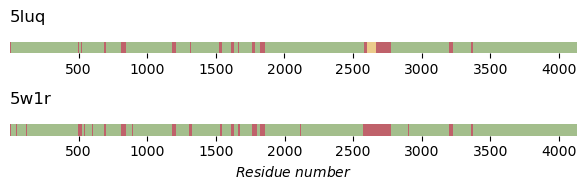

In [ ]:
from tempfile import gettempdir

import biotite.database.rcsb as rcsb
import biotite.structure.io as strucio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle


def plot_gaps(pdb_id, chain_id, ax):
    # 구조 파일 다운로드 및 파싱
    path = rcsb.fetch(pdb_id, "bcif", gettempdir())
    atom_array = strucio.load_structure(path)

    # 지정된 체인만 고려
    atom_array = atom_array[atom_array.chain_id == chain_id]

    # 각 잔기의 상태를 저장할 배열 (0: 없음, 1: 폴리알라닌, 2: 존재)
    states = np.zeros(atom_array.res_id[-1], dtype=int)

    # 각 잔기의 상태 결정
    for i in range(len(states)):
        residue = atom_array[atom_array.res_id == i + 1]
        if len(residue) == 0:
            states[i] = 0  # 잔기 없음
        elif residue.res_name[0] == "UNK":
            states[i] = 1  # 폴리알라닌
        else:
            states[i] = 2  # 잔기 존재

    # 각 상태의 연속된 구간 찾기
    state_intervals = []
    curr_start = None
    for i in range(len(states)):
        if curr_start is None:
            curr_start = i
        elif states[i] != states[i - 1]:
            state_intervals.append((curr_start, i, states[i - 1]))
            curr_start = i
    state_intervals.append((curr_start, len(states), states[-1]))

    # 상태 구간을 색상으로 표시 (Nord 테마의 Aurora 색상 사용)
    colors = ["#BF616A", "#EBCB8B", "#A3BE8C"]  # Nord 색상: Red, Yellow, Green
    for start, stop, state in state_intervals:
        ax.add_patch(
            Rectangle(
                (start + 1 - 0.5, 0),
                stop - start,
                1,
                edgecolor="None",
                facecolor=colors[state],
            )
        )

    # 그래프 스타일 설정
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_xlim(0.5, len(states) + 0.5)
    ax.set_ylim(0, 2)


# 메인 그래프 생성
fig = plt.figure(figsize=(6, 2))

# 5luq 구조 그래프
ax = fig.add_subplot(211)
ax.set_title("5luq", loc="left")
plot_gaps("5luq", "A", ax)

# 5w1r 구조 그래프
ax = fig.add_subplot(212)
ax.set_title("5w1r", loc="left")
plot_gaps("5w1r", "A", ax)
ax.set_xlabel(r"$Residue \ number$")

fig.tight_layout()
plt.show()

### 당화된 아미노산 시각화

이 예시에서는 임의의 단백질에서 아미노산 잔기의 당화(glycosylation)를 시각적으로 나타냅니다. 먼저, 당류에 속하는 잔기 이름 목록이 필요합니다. 이러한 목록을 만드는 것은 상당히 번거롭습니다. 여기에서는 Mol* 소프트웨어 에서 목록을 가져와 사용하겠습니다. 

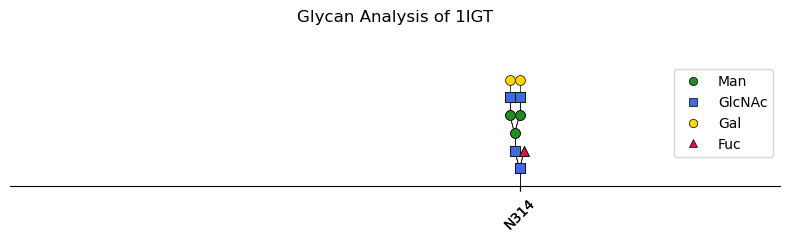

In [ ]:
from tempfile import gettempdir

import biotite.database.rcsb as rcsb
import biotite.sequence as seq
import biotite.structure as struc
import biotite.structure.io.pdbx as pdbx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.lines import Line2D
from networkx.drawing.nx_pydot import graphviz_layout

# 상수 정의
NODE_SIZE = 50
HORIZONTAL_NODE_DISTANCE = 3
LINE_WIDTH = 0.5
SACCHARIDE_NAMES = {
    res_name: common_name
    for common_name, res_names in [
        ("Glc", ["GLC", "BGC", "Z8T", "TRE", "MLR"]),
        ("Man", ["MAN", "BMA"]),
        ("Gal", ["GLA", "GAL", "GZL", "GXL", "GIV"]),
        ("Gul", ["4GL", "GL0", "GUP", "Z8H"]),
        ("Alt", ["Z6H", "3MK", "SHD"]),
        ("All", ["AFD", "ALL", "WOO", "Z2D"]),
        ("Tal", ["ZEE", "A5C"]),
        ("Ido", ["ZCD", "Z0F", "4N2"]),
        ("GlcNAc", ["NDG", "NAG", "NGZ"]),
        ("ManNAc", ["BM3", "BM7"]),
        ("GalNAc", ["A2G", "NGA", "YYQ"]),
        ("GulNAc", ["LXB"]),
        ("AllNAc", ["NAA"]),
        ("IdoNAc", ["LXZ"]),
        ("GlcN", ["PA1", "GCS"]),
        ("ManN", ["95Z"]),
        ("GalN", ["X6X", "1GN"]),
        ("GlcA", ["GCU", "BDP"]),
        ("ManA", ["MAV", "BEM"]),
        ("GalA", ["ADA", "GTR", "GTK"]),
        ("GulA", ["LGU"]),
        ("TalA", ["X1X", "X0X"]),
        ("IdoA", ["IDR"]),
        ("Qui", ["G6D", "YYK"]),
        ("Rha", ["RAM", "RM4", "XXR"]),
        ("6dGul", ["66O"]),
        ("Fuc", ["FUC", "FUL", "FCA", "FCB"]),
        ("QuiNAc", ["Z9W"]),
        ("FucNAc", ["49T"]),
        ("Oli", ["DDA", "RAE", "Z5J"]),
        ("Tyv", ["TYV"]),
        ("Abe", ["ABE"]),
        ("Par", ["PZU"]),
        ("Dig", ["Z3U"]),
        ("Ara", ["64K", "ARA", "ARB", "AHR", "FUB", "BXY", "BXX"]),
        ("Lyx", ["LDY", "Z4W"]),
        ("Xyl", ["XYS", "XYP", "XYZ", "HSY", "LXC"]),
        ("Rib", ["YYM", "RIP", "RIB", "BDR", "0MK", "Z6J", "32O"]),
        ("Kdn", ["KDM", "KDN"]),
        ("Neu5Ac", ["SIA", "SLB"]),
        ("Neu5Gc", ["NGC", "NGE"]),
        ("LDManHep", ["GMH"]),
        ("Kdo", ["KDO"]),
        ("DDManHep", ["289"]),
        ("MurNAc", ["MUB", "AMU"]),
        ("Mur", ["1S4", "MUR"]),
        ("Api", ["XXM"]),
        ("Fru", ["BDF", "Z9N", "FRU", "LFR"]),
        ("Tag", ["T6T"]),
        ("Sor", ["SOE"]),
        ("Psi", ["PSV", "SF6", "SF9"]),
    ]
    for res_name in res_names
}
SACCHARIDE_REPRESENTATION = {
    "Glc": ("o", "royalblue"),
    "Man": ("o", "forestgreen"),
    "Gal": ("o", "gold"),
    "Gul": ("o", "darkorange"),
    "Alt": ("o", "pink"),
    "All": ("o", "purple"),
    "Tal": ("o", "lightsteelblue"),
    "Ido": ("o", "chocolate"),
    "GlcNAc": ("s", "royalblue"),
    "ManNAc": ("s", "forestgreen"),
    "GalNAc": ("s", "gold"),
    "GulNAc": ("s", "darkorange"),
    "AllNAc": ("s", "purple"),
    "IdoNAc": ("s", "chocolate"),
    "GlcN": ("1", "royalblue"),
    "ManN": ("1", "forestgreen"),
    "GalN": ("1", "gold"),
    "GlcA": ("v", "royalblue"),
    "ManA": ("v", "forestgreen"),
    "GalA": ("v", "gold"),
    "GulA": ("v", "darkorange"),
    "TalA": ("v", "lightsteelblue"),
    "IdoA": ("v", "chocolate"),
    "Qui": ("^", "royalblue"),
    "Rha": ("^", "forestgreen"),
    "6dGul": ("^", "darkorange"),
    "Fuc": ("^", "crimson"),
    "QuiNAc": ("P", "royalblue"),
    "FucNAc": ("P", "crimson"),
    "Oli": ("X", "royalblue"),
    "Tyv": ("X", "forestgreen"),
    "Abe": ("X", "darkorange"),
    "Par": ("X", "pink"),
    "Dig": ("X", "purple"),
    "Ara": ("*", "forestgreen"),
    "Lyx": ("*", "gold"),
    "Xyl": ("*", "darkorange"),
    "Rib": ("*", "pink"),
    "Kdn": ("D", "forestgreen"),
    "Neu5Ac": ("D", "mediumvioletred"),
    "Neu5Gc": ("D", "turquoise"),
    "LDManHep": ("H", "forestgreen"),
    "Kdo": ("H", "gold"),
    "DDManHep": ("H", "pink"),
    "MurNAc": ("H", "purple"),
    "Mur": ("H", "chocolate"),
    "Api": ("p", "royalblue"),
    "Fru": ("p", "forestgreen"),
    "Tag": ("p", "gold"),
    "Sor": ("p", "darkorange"),
    "Psi": ("p", "pink"),
    # 기본 표현
    None: ("h", "black"),
}


def load_structure_data(pdb_id):
    """
    PDB ID를 기반으로 단백질 구조 데이터를 다운로드하고 로드합니다.
    """
    try:
        pdbx_file = pdbx.BinaryCIFFile.read(rcsb.fetch(pdb_id, "bcif", gettempdir()))
        structure = pdbx.get_structure(pdbx_file, model=1, include_bonds=True)
        return structure
    except Exception as e:
        print(f"Error loading structure {pdb_id}: {e}")
        return None


def filter_structure(structure):
    """
    구조체에서 탄수화물 및 아미노산만 필터링합니다.
    """
    return structure[struc.filter_carbohydrates(structure) | struc.filter_amino_acids(structure)]


def create_residue_graph(structure):
    """
    구조체에서 잔기 간의 연결을 나타내는 그래프를 생성합니다.
    """
    graph = nx.Graph()
    graph.add_nodes_from(struc.get_residue_starts(structure))
    bonds = structure.bonds.as_array()[:, :2]
    connected = struc.get_residue_starts_for(structure, bonds.flatten()).reshape(bonds.shape)
    connected = connected[connected[:, 0] != connected[:, 1]]
    graph.add_edges_from(connected)
    return graph


def draw_initial_graph(graph, is_glycan):
    """
    전체 구조 그래프를 그립니다.
    """
    fig, ax = plt.subplots(figsize=(4.0, 4.0))
    nx.draw(
        graph,
        ax=ax,
        node_size=10,
        node_color=["crimson" if is_glycan[atom_i] else "royalblue" for atom_i in graph.nodes()],
    )
    return fig, ax


def remove_non_glycan_edges(graph, is_glycan):
    """
    글리칸이 아닌 잔기 간의 엣지를 제거합니다.
    """
    for atom_i, atom_j in list(graph.edges):
        if not is_glycan[atom_i] and not is_glycan[atom_j]:
            graph.remove_edge(atom_i, atom_j)


def get_glycan_subgraphs(graph):
    """
    글리칸을 포함하는 연결된 서브그래프를 가져옵니다.
    """
    return [
        graph.subgraph(nodes).copy() for nodes in nx.connected_components(graph) if len(nodes) > 1
    ]


def draw_glycan_details(structure, glycan_graphs, is_amino_acid, is_glycan):
    """
    개별 글리칸 그래프를 그리고 세부 정보를 표시합니다.
    """
    fig, ax = plt.subplots(figsize=(8.0, 2.5))
    glycosylated_residue_ids = []
    glycosylated_residue_symbols = []
    legend_elements = {}

    for glycan_graph in glycan_graphs:
        glycan_graph = nx.DiGraph(
            [(min(atom_i, atom_j), max(atom_i, atom_j)) for atom_i, atom_j in glycan_graph.edges()]
        )
        root = [atom_i for atom_i in glycan_graph.nodes() if is_amino_acid[atom_i]]
        if not root:
            continue
        root = root[0]
        glycosylated_residue_ids.append(structure.res_id[root])
        glycosylated_residue_symbols.append(
            seq.ProteinSequence.convert_letter_3to1(structure.res_name[root])
        )
        root_neighbor = list(glycan_graph.neighbors(root))[0]
        pos = graphviz_layout(glycan_graph, prog="dot")
        nodes = [int(key) for key in pos.keys()]
        pos_array = np.array(list(pos.values()))
        pos_array -= pos_array[nodes.index(root)]
        pos_array[:, 1] /= (
            pos_array[nodes.index(root_neighbor), 1] - pos_array[nodes.index(root), 1]
        )
        non_zero_dist = np.abs(pos_array[(pos_array[:, 0] != 0), 0])
        if len(non_zero_dist) != 0:
            pos_array[:, 0] *= HORIZONTAL_NODE_DISTANCE / np.min(non_zero_dist)
        pos_array[:, 0] += structure.res_id[root]
        pos = {node: tuple(coord) for node, coord in zip(nodes, pos_array)}

        nx.draw_networkx_edges(
            glycan_graph, pos, ax=ax, arrows=False, node_size=0, width=LINE_WIDTH
        )

        for atom_i in glycan_graph.nodes():
            if not is_glycan[atom_i]:
                continue
            common_name = SACCHARIDE_NAMES.get(structure.res_name[atom_i])
            shape, color = SACCHARIDE_REPRESENTATION[common_name]
            ax.scatter(
                pos[atom_i][0],
                pos[atom_i][1],
                s=NODE_SIZE,
                marker=shape,
                facecolor=color,
                edgecolor="black",
                linewidths=LINE_WIDTH,
            )
            legend_elements[common_name] = Line2D(
                [0],
                [0],
                label=common_name,
                linestyle="None",
                marker=shape,
                markerfacecolor=color,
                markeredgecolor="black",
                markeredgewidth=LINE_WIDTH,
            )

    ax.legend(handles=legend_elements.values(), loc="upper right")
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.tick_params(axis="x", bottom=True, labelbottom=True)
    ax.tick_params(axis="y", left=False, labelleft=False)
    ax.set_xticks(glycosylated_residue_ids)
    ax.set_xticklabels(
        [
            symbol + str(res_id)
            for symbol, res_id in zip(glycosylated_residue_symbols, glycosylated_residue_ids)
        ],
        rotation=45,
    )
    ax.set_xlim(1, np.max(structure.res_id[is_amino_acid]))
    ax.set_ylim(0, 7)
    return fig, ax


PDB_ID = "1IGT"  # 항체 PDB ID
structure = filter_structure(load_structure_data(PDB_ID))
is_glycan = struc.filter_carbohydrates(structure)
is_amino_acid = struc.filter_amino_acids(structure)

graph = create_residue_graph(structure)
remove_non_glycan_edges(graph, is_glycan)
glycan_graphs = get_glycan_subgraphs(graph)

fig, ax = draw_glycan_details(structure, glycan_graphs, is_amino_acid, is_glycan)

fig.suptitle(f"Glycan Analysis of {PDB_ID}")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목을 위한 공간 확보
plt.show()

# Reference

- P. Kunzmann, T. D. Müller, M. Greil, J. H. Krumbach, J. M. Anter, D. Bauer, F. Islam, K. Hamacher, "Biotite: new tools for a versatile Python bioinformatics library," BMC Bioinformatics, June 2023. doi: 10.1186/s12859-023-05345-6
- Cock PJ, Antao T, Chang JT, Chapman BA, Cox CJ, Dalke A, Friedberg I, Hamelryck T, Kauff F, Wilczynski B, de Hoon MJ. Biopython: freely available Python tools for computational molecular biology and bioinformatics. Bioinformatics. 2009, doi: 10.1093/bioinformatics/btp163.